# Problem Statement

- **Analyzing the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.**


- **Understand the spending behaviour of both male and female to help business make right decisions.**
    - **Do women spend more on Black Friday than men?**

# Installing Dependencies

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics
import warnings
warnings.filterwarnings("ignore") 

# Loading Dataset

In [324]:
walmart = pd.read_csv("walmart.csv")
walmart

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  
1                               2               0                 1     15200  
2                               2               0                12      1422  
3                               2               0                12      1057  
4                              4+               0                 8      7969  
...                           ...             ...               ...       ...  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490  

[550068 rows x 10 columns]

# Shape of Data

In [325]:
walmart.shape

(550068, 10)

**No. of rows (datapoints) - `5,50,068` ||**
**No. of columns (features) - `10`**

# Datatype of features

In [326]:
walmart.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

**No. of categorical feature - `5` || No. of continuous (numerical) feature - `5`** 

# Unique Value (counts) for each features

In [327]:
walmart.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

**`Insights`**
- There are total **`550068`** datapoints out of which only **`5891`** User_ID found means same users bought multiple product or do multiple transactions.

# Missing Values Detection

In [328]:
walmart.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**`There is no missing values found in the dataset`**

# Validating duplicate values

In [329]:
walmart.duplicated().sum()

0

**`There is no duplicated values found in the dataset`**

In [330]:
cat_col = ["User_ID", "Product_ID", "Gender", "Age", "City_Category", "Marital_Status"]

for i in cat_col:
    walmart[i] = walmart[i].astype("category")

walmart.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object

# Statistical Summary

In [331]:
walmart.describe().T

count         mean          std   min     25%     50%  \
Occupation        550068.0     8.076707     6.522660   0.0     2.0     7.0   
Product_Category  550068.0     5.404270     3.936211   1.0     1.0     5.0   
Purchase          550068.0  9263.968713  5023.065394  12.0  5823.0  8047.0   

                      75%      max  
Occupation           14.0     20.0  
Product_Category      8.0     20.0  
Purchase          12054.0  23961.0

- **`As it is quite obvious that there is significant difference in the mean and std for Purchase column which might be containing outliers.`**

In [332]:
walmart.describe(include = ["object", "category"]).T

count unique        top    freq
User_ID                     550068   5891    1001680    1026
Product_ID                  550068   3631  P00265242    1880
Gender                      550068      2          M  414259
Age                         550068      7      26-35  219587
City_Category               550068      3          B  231173
Stay_In_Current_City_Years  550068      5          1  193821
Marital_Status              550068      2          0  324731

- **`Customer (1001680) has purchased more than others`**

- **`Product (P00265242) is most bought item`**

- **`Most of the customers are Male`**

- **`Most of customers lies in [26-35] Age bracket`**

- **`Majority of the customers are Unmarried`**

# Non-Graphical Analysis

# Value counts and Unique Attributes

In [333]:
walmart.groupby(["Gender"])["User_ID"].nunique() / walmart["User_ID"].nunique() * 100

Gender
F    28.280428
M    71.719572
Name: User_ID, dtype: float64

In [334]:
walmart.groupby(["Gender"])["Purchase"].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

- **`There are only 28% female customers. While male customers constitute around 72% in our dataset`**

In [335]:
walmart.groupby(["Age"])["User_ID"].nunique() / walmart["User_ID"].nunique() * 100

Age
0-17      3.700560
18-25    18.146325
26-35    34.849771
36-45    19.809879
46-50     9.013750
51-55     8.164997
55+       6.314717
Name: User_ID, dtype: float64

In [336]:
walmart.groupby(["Age"])["Purchase"].describe()

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0

- **`Around 35% customers are in [26-35] age bracket. On other hand customers in age bracket [0-17], [51-55] & [55+] showing less purchasing behaviour.`**

In [337]:
walmart.groupby(["Stay_In_Current_City_Years"])["User_ID"].nunique()

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
Name: User_ID, dtype: int64

- **`Customers staying for 1-2 years in same city purchased more than others`**

In [338]:
walmart.groupby(["Marital_Status"])["User_ID"].nunique() / walmart["User_ID"].nunique() * 100

Marital_Status
0    58.003735
1    41.996265
Name: User_ID, dtype: float64

- **`58:42 is the ratio between married and unmarried customers`**

In [339]:
walmart.groupby(["City_Category"])["User_ID"].nunique()

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

- **`Most of customers belogs to C city_category`**

In [340]:
walmart.groupby(['City_Category'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
City_Category                                                             
A              147720.0  8911.939216  4892.115238  12.0  5403.0  7931.0   
B              231173.0  9151.300563  4955.496566  12.0  5460.0  8005.0   
C              171175.0  9719.920993  5189.465121  12.0  6031.5  8585.0   

                   75%      max  
City_Category                    
A              11786.0  23961.0  
B              11986.0  23960.0  
C              13197.0  23961.0

- **`Most of the customers belongs to City C But customers from city_category B tend to purchase more suggest the fact they visit store multiple times during that period`**

# Graphical Analysis

## Univariate Countinous Variable Analysis

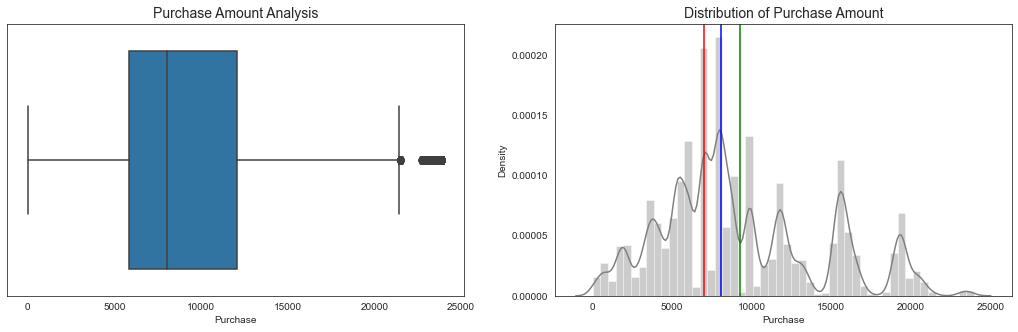

In [341]:
fig = plt.figure(figsize=(18,5))
sns.set_style("white")

plt.subplot(1, 2, 1)
sns.boxplot(data = walmart, x = "Purchase", orient = "h")

plt.title('Purchase Amount Analysis', fontsize = '14')


plt.subplot(1, 2, 2)
sns.distplot(a = walmart["Purchase"], color = 'gray')
plt.title("Distribution of Purchase Amount", fontsize = '14')
plt.axvline(walmart["Purchase"].mean(),color="g")
plt.axvline(walmart["Purchase"].median(),color="b")
plt.axvline(walmart["Purchase"].mode()[0],color="r")

plt.show()

**`Insights`**
- There are outliers in purchase amount. 
- While observing the distribution of purchase amount from density plot. It is quite obvious that the distribution is right skewed means majority of data concentrated on left side.
- Majority of customer purchase within 5,000 - 20,000 range.

# Detecting Outliers

In [342]:
print('Mean of Purchase Amount   = ', walmart["Purchase"].mean())
print('Median of Purchase Amount = ', walmart["Purchase"].median())

Mean of Purchase Amount   =  9263.968712959126
Median of Purchase Amount =  8047.0


- **`There is significant difference in Mean & Median of Purchase Amounts lead to outliers`**

# Handling Outliers

In [343]:
q1 = walmart["Purchase"].quantile(0.25)
q3 = walmart["Purchase"].quantile(0.75)

IQR = q3 - q1
print("1. First Quartile (q1) = ", q1)
print("2. Third Quartile (q2) = ", q3)
print("3. IQR                 = ", IQR)

1. First Quartile (q1) =  5823.0
2. Third Quartile (q2) =  12054.0
3. IQR                 =  6231.0


In [344]:
walmart_new = walmart.copy()

# walmart_new = walmart_new.loc[(walmart_new["Purchase"] > q1 - 1.5*IQR) & (walmart_new["Purchase"] < q3 + 1.5*IQR)]
walmart_new["Purchase"] = np.clip(walmart_new["Purchase"], q1-1.5*IQR, q3 + 1.5*IQR)
walmart_new.shape

(550068, 10)

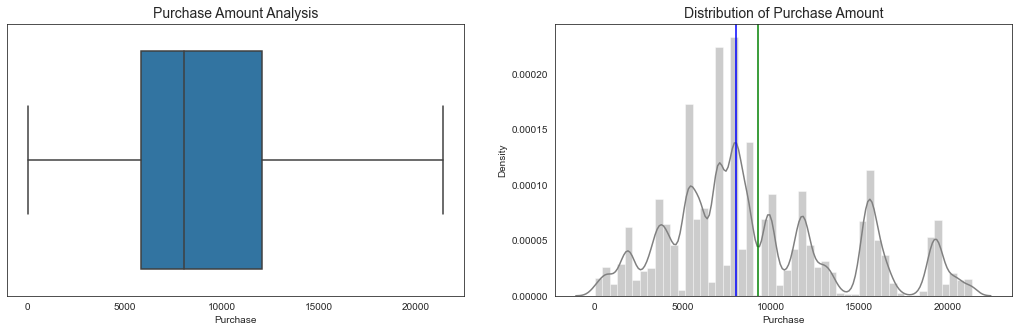

In [345]:
fig = plt.figure(figsize=(18,5))
sns.set_style("white")

plt.subplot(1, 2, 1)
sns.boxplot(data = walmart_new, x = "Purchase", orient = "h")

plt.title('Purchase Amount Analysis', fontsize = '14')


plt.subplot(1, 2, 2)
sns.distplot(a = walmart_new["Purchase"], color = 'gray')
plt.title("Distribution of Purchase Amount", fontsize = '14')
plt.axvline(walmart_new["Purchase"].mean(),color="g")
plt.axvline(walmart_new["Purchase"].median(),color="b")

plt.show()

- **`Outliers has been clipped now`**

# Univariate Categorical Variable Analysis

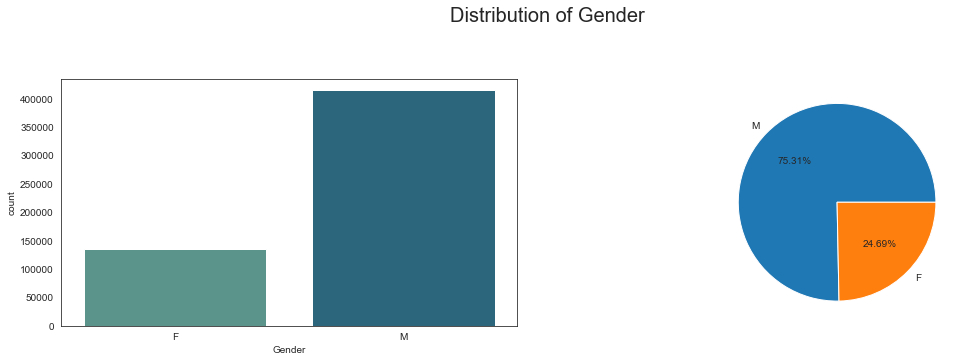

In [346]:
fig = plt.figure(figsize=(18,10))
sns.set_style(style='white')
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(data=walmart_new, x="Gender", palette="crest")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(walmart_new["Gender"].value_counts(), 
        labels = walmart_new["Gender"].value_counts().index, 
        autopct = '%1.2f%%')
plt.suptitle('Distribution of Gender', fontsize = 20)

plt.show()

**`Insights`**

- Males clearly purchase more than females. 75% of men and only 25% of women purchase products.

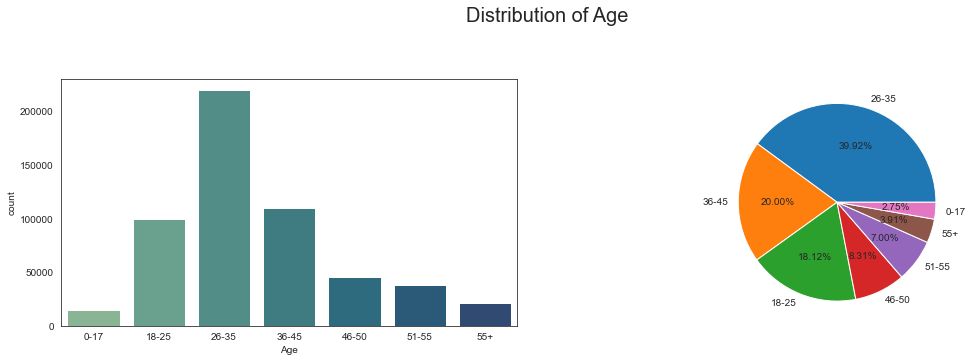

In [347]:
fig = plt.figure(figsize=(18,10))
sns.set_style(style='white')
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(data=walmart_new, x="Age", palette="crest")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(walmart_new["Age"].value_counts(), 
        labels = walmart_new["Age"].value_counts().index, 
        autopct = '%1.2f%%')
plt.suptitle('Distribution of Age', fontsize = 20)

plt.show()

**`Insights`**

- 60% of purchases are made by people between the ages of 26 and 45

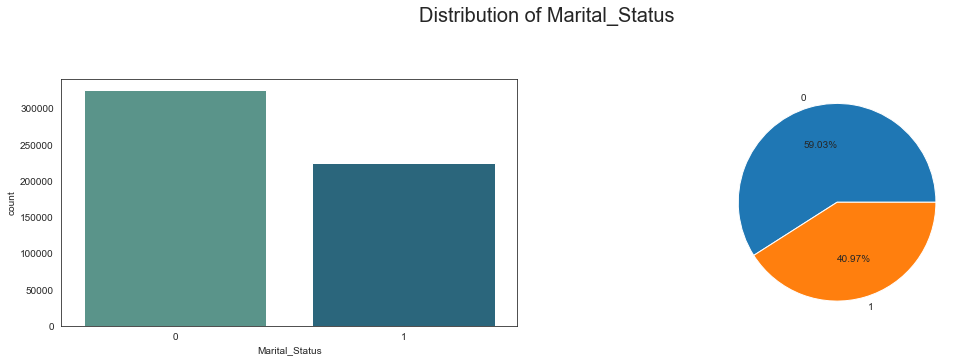

In [348]:
fig = plt.figure(figsize=(18,10))
sns.set_style(style='white')
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(data=walmart, x="Marital_Status", palette="crest")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(walmart_new["Marital_Status"].value_counts(), 
        labels = walmart_new["Marital_Status"].value_counts().index, 
        autopct = '%1.2f%%')
plt.suptitle('Distribution of Marital_Status', fontsize = 20)

plt.show()

**`Insights`**

- Most of customers are unmarried.

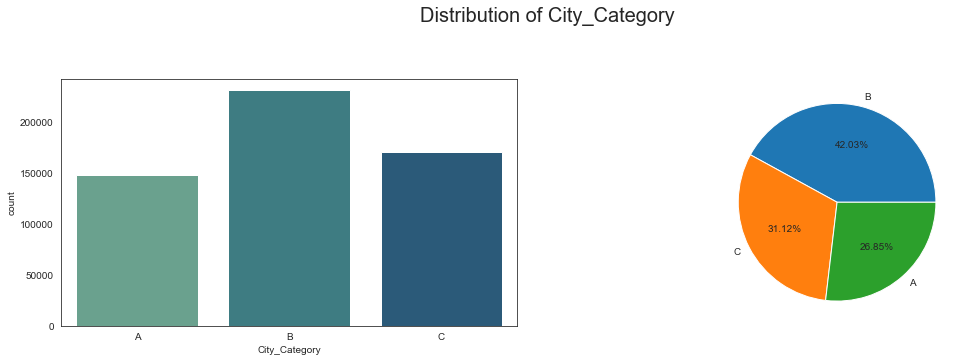

In [349]:
fig = plt.figure(figsize=(18,10))
sns.set_style(style='white')
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(data=walmart_new, x="City_Category", palette="crest")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(walmart_new["City_Category"].value_counts(), 
        labels = walmart_new["City_Category"].value_counts().index, 
        autopct = '%1.2f%%')
plt.suptitle('Distribution of City_Category', fontsize = 20)

plt.show()

**`Insights`**

- `City Category B` accounts for 42%, `City Category C` 31%, and `City Category A` represents 27% of all customer purchases.

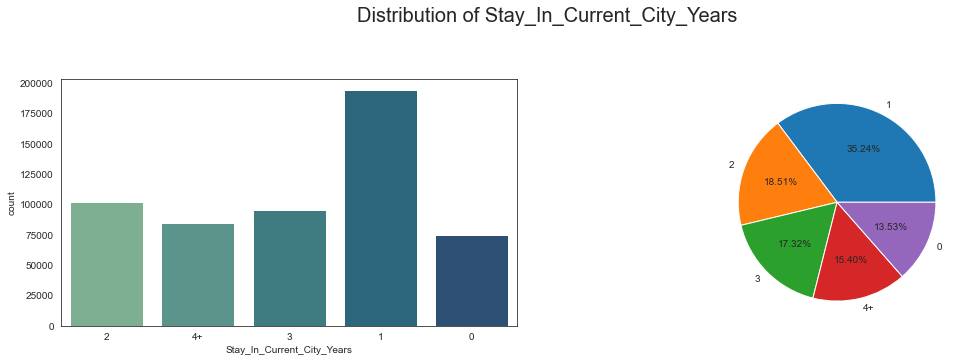

In [350]:
fig = plt.figure(figsize=(18,10))
sns.set_style(style='white')
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(data=walmart_new, x="Stay_In_Current_City_Years", palette="crest")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(walmart_new["Stay_In_Current_City_Years"].value_counts(), 
        labels = walmart_new["Stay_In_Current_City_Years"].value_counts().index, 
        autopct = '%1.2f%%')
plt.suptitle('Distribution of Stay_In_Current_City_Years', fontsize = 20)
plt.show()

**`Insights`**
- Most of customer stayed around 1 years in the current city

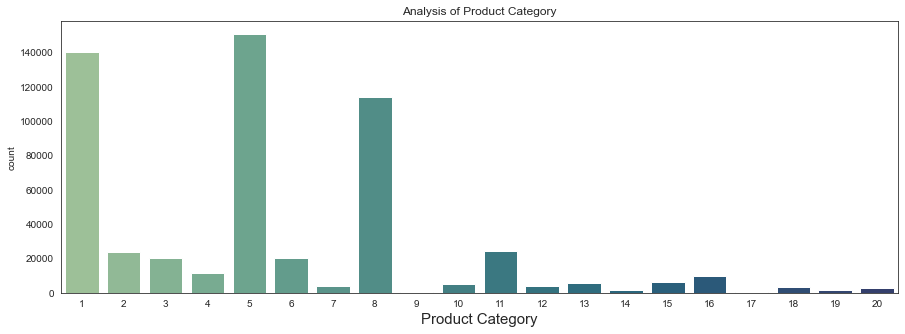

In [351]:
fig = plt.figure(figsize = (15,5))

sns.countplot(data = walmart_new, x = "Product_Category", palette="crest")
plt.xlabel("Product Category", fontsize = 15)
plt.title("Analysis of Product Category")
plt.show()

**`Insights`**
- Product categories 1, 5 and 8 most bought products.

# Bivariate Analysis

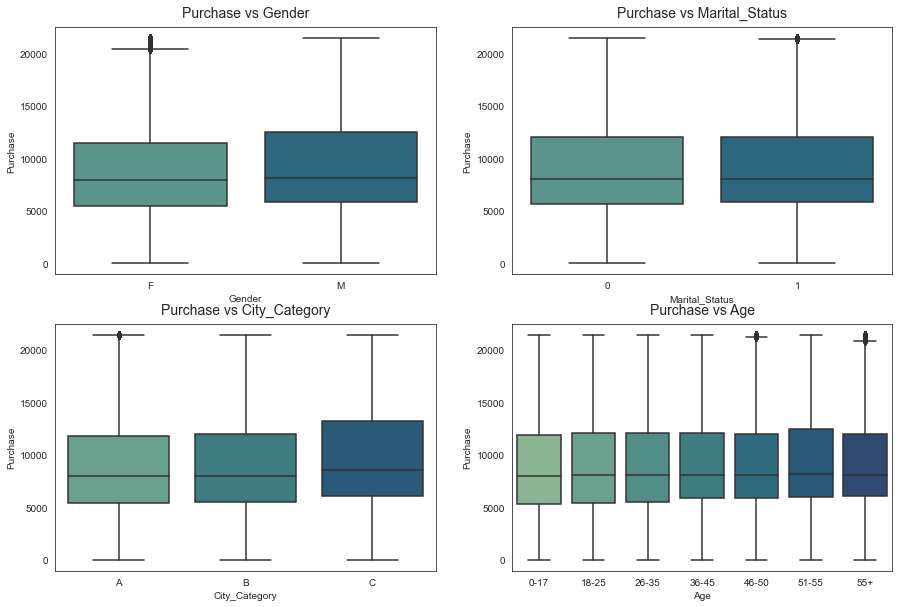

In [352]:
cat_col = ["Gender", "Marital_Status", "City_Category", "Age"]

fig, axs = plt.subplots(nrows=2, ncols = 2, figsize=(15,10))
k = 0
sns.set_style("dark")
for i in range(2):
    for j in range(2):
        sns.boxplot(data=walmart_new, x=cat_col[k], y="Purchase", palette='crest', ax=axs[i, j])
        axs[i, j].set_title("Purchase vs " + cat_col[k], pad = 10, fontsize = 14)
        k += 1
plt.show()
    

**`Insights`**
- Customers puchasing behaviour are almost stable at equilibrium irrespective on `Gender`, `Marital_status`, `City_Category` & `Age`
- Median purchase from each features are almost same

# Lets draw analysis for Gender

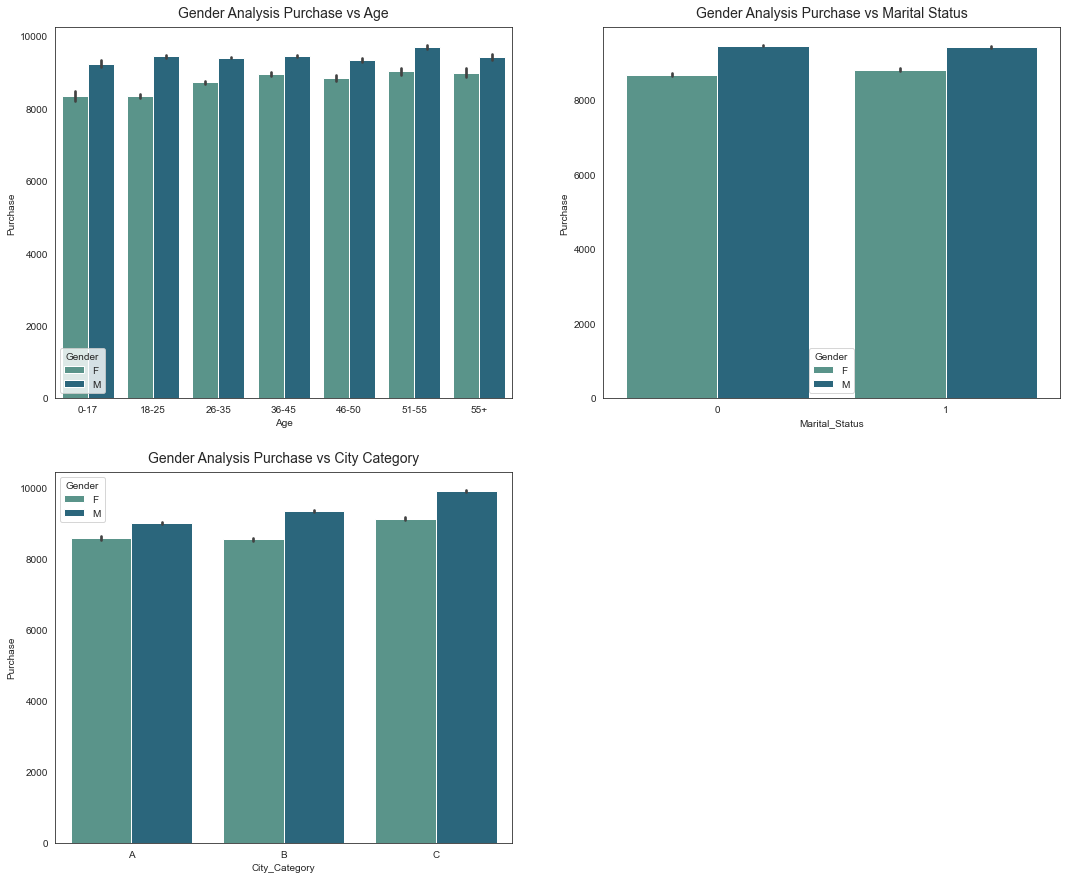

In [353]:
fig = plt.figure(figsize=(18, 15))

sns.set_style("white")

ax1 = plt.subplot2grid((2, 2), (0, 0))
sns.barplot(data=walmart_new, x = "Age", y = "Purchase", ax=ax1, hue = "Gender", palette="crest")        
plt.title("Gender Analysis Purchase vs Age", pad = 10, fontsize = 14)

ax1 = plt.subplot2grid((2, 2), (0, 1))
sns.barplot(data=walmart_new, x = "Marital_Status", y = "Purchase", ax=ax1, hue = "Gender", palette="crest")        
plt.title("Gender Analysis Purchase vs Marital Status", pad = 10, fontsize = 14)

ax1 = plt.subplot2grid((2, 2), (1, 0))
sns.barplot(data=walmart_new, x = "City_Category", y = "Purchase", ax=ax1, hue = "Gender", palette="crest")        
plt.title("Gender Analysis Purchase vs City Category", pad = 10, fontsize = 14)

plt.show()

**`Insights`**
- Purchases are high in city category C
- Purchase is the somehow same for all age groups
- Female Customers form City category C is more than other city category
- Purchases are same for all Marital Status 

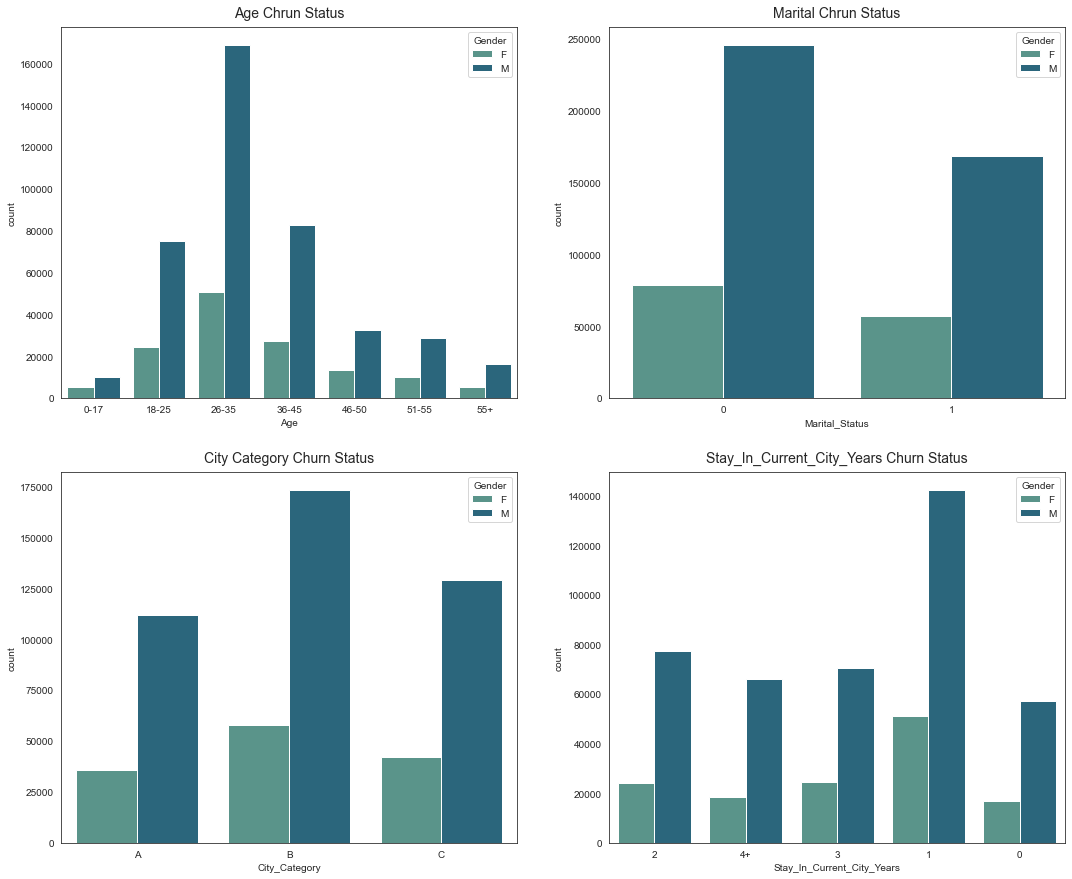

In [354]:
fig = plt.figure(figsize=(18, 15))

sns.set_style("white")

ax1 = plt.subplot2grid((2, 2), (0, 0))
sns.countplot(data=walmart_new, x = "Age", ax=ax1, hue = "Gender", palette="crest")        
plt.title("Age Chrun Status", pad = 10, fontsize = 14)

ax1 = plt.subplot2grid((2, 2), (0, 1))
sns.countplot(data=walmart_new, x = "Marital_Status", ax=ax1, hue = "Gender", palette="crest")        
plt.title("Marital Chrun Status", pad = 10, fontsize = 14)

ax1 = plt.subplot2grid((2, 2), (1, 0))
sns.countplot(data=walmart_new, x = "City_Category", ax=ax1, hue = "Gender", palette="crest")        
plt.title("City Category Churn Status", pad = 10, fontsize = 14)

ax1 = plt.subplot2grid((2, 2), (1, 1))
sns.countplot(data=walmart_new, x = "Stay_In_Current_City_Years", ax=ax1, hue = "Gender", palette="crest")        
plt.title("Stay_In_Current_City_Years Churn Status", pad = 10, fontsize = 14)

plt.show()

**`Insights`**
- Most of female customers are from city category C
- Most of female customer stay 1 year in the current city than others
- Most of the customers are in range 18-45 age bracket
- There is huge difference in the male and female customer for age bracket [26-35]
- There is significant difference of male customers. Most of the male customers are single. While female customers marital status not more significant as there is not so much difference.

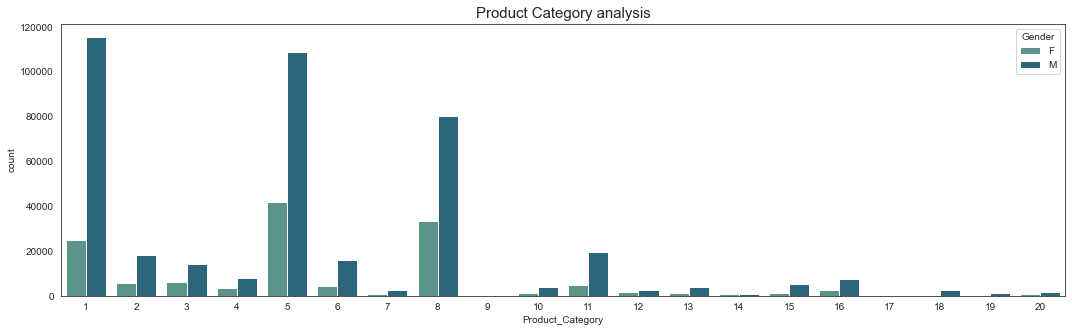

In [355]:
fig = plt.figure(figsize=(18, 5))

plt.title("Product Category analysis", fontsize = 15)
sns.countplot(data=walmart_new, x = "Product_Category", hue = "Gender", palette="crest")

plt.show()

**`Insights`**
- Product Category 5 and 8 are demanding among female customers
- Proudct Category 1 and 5 are most demanding among male customers

# Lets draw analysis for City Category Among Different Age Brackets

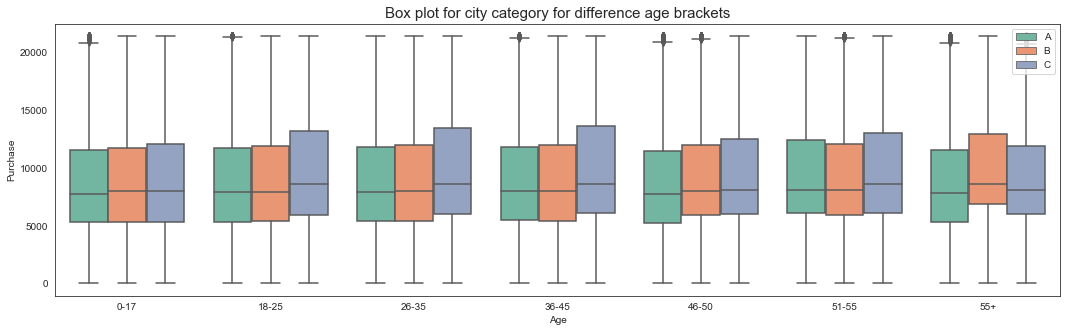

In [356]:
fig = plt.figure(figsize=(18, 5))

plt.title("Box plot for city category for difference age brackets", fontsize = 15)
sns.boxplot(data=walmart_new, x = "Age", y = "Purchase", hue = "City_Category", palette="Set2")

plt.legend(loc = "upper right")
plt.show()

**`Insights`**
- Product Category B is popular among age group 55+
- Product Category A & B are quite same in demand among other age groups except 55+
- While Product Category C is in demand for age group 18-45 and slightly in 51-55 age group

# Correlation Analysis

In [357]:
walmart_new.corr()

Occupation  Product_Category  Purchase
Occupation          1.000000         -0.007618  0.020853
Product_Category   -0.007618          1.000000 -0.347413
Purchase            0.020853         -0.347413  1.000000

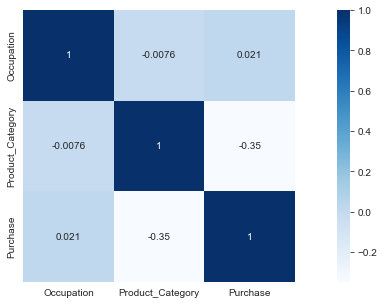

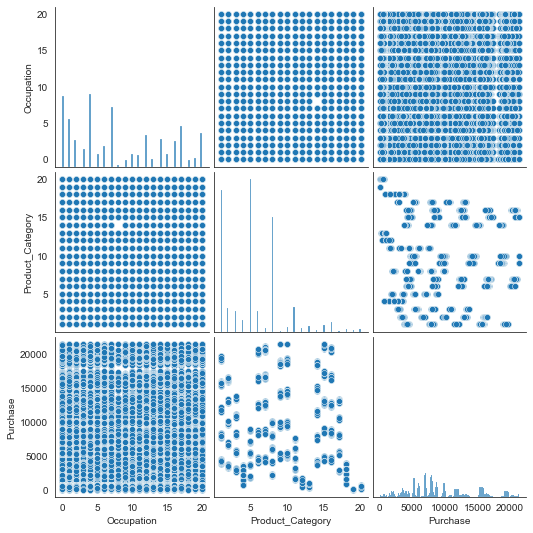

In [358]:
plt.figure(figsize = (15, 5))
sns.heatmap(data=walmart_new.corr(), annot=True, cmap="Blues", square=True)

sns.pairplot(walmart_new)
plt.show()

**`Insights`**
- Our dataset is hightly categorial variable centric. So we can hardly find correlation in our dataset.

# 4. Answering questions

## 4.1  Are women spending more money per transaction than men? Why or Why not?

In [359]:
walmart_new.groupby(["Gender", "City_Category"])["User_ID"].count()

Gender  City_Category
F       A                 35704
        B                 57796
        C                 42309
M       A                112016
        B                173377
        C                128866
Name: User_ID, dtype: int64

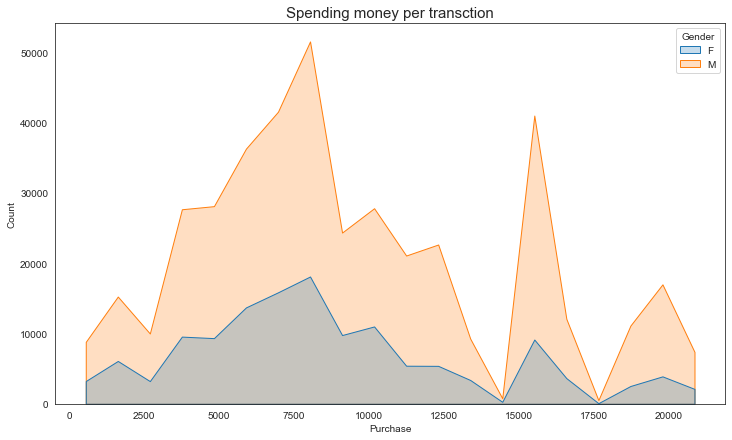

In [360]:
plt.figure(figsize=(12, 7))

plt.title("Spending money per transction", fontsize = 15)
sns.histplot(data=walmart_new, x = "Purchase", bins=20, hue = "Gender", element="poly")

plt.show()

**`Insights`**
- The amount of money spent by women customers per transaction is quite less than that of men. There would be multiple reasons for that : -
    - Socio-economic status
    - Generally male starts earning way before females
    - Generally male customers earns more than females

### Lets take sample of data to verify this fact

In [361]:
walmart_new.sample(5000, replace=True).groupby(["Gender"])["Purchase"].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                    
F       1241.0  8648.491136  4814.681119  12.0  5373.0  7876.0  11376.0   
M       3759.0  9401.071562  5053.043666  12.0  5835.0  8081.0  12162.5   

            max  
Gender           
F       21400.5  
M       21400.5

**`Insights`**
- Even after taking sample of 5000 customer, male customers tends to spend more than that of females

# 4.2 Confidence intervals and distribution of the mean of the expenses by female and male customers

In [362]:
walmart_new.groupby(["Gender"])["Purchase"].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8726.256327  4743.242716  12.0  5433.0  7914.0  11400.0   
M       414259.0  9428.373455  5068.732811  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       21400.5  
M       21400.5

In [363]:
walmart_new.shape

(550068, 10)

**`Insights`**
- After clipping outlier in our dataset. We have found that out of 550k datapoint -
    - Males are 414K
    - Females are 135K

In [364]:
walmart_new_smp_male = walmart_new.loc[walmart["Gender"] == "M"]["Purchase"]
walmart_new_smp_female = walmart_new.loc[walmart["Gender"] == "F"]["Purchase"]

In [365]:
print("Male customers are: ", walmart_new_smp_male.shape[0])
print("Female customers are: ", walmart_new_smp_female.shape[0])

Male customers are:  414259
Female customers are:  135809


# Calculating CI (90%, 95%, 99%) using Bootstrapping for Puchases based on Gender using CLT

In [366]:
def bootstrapping_gender_purchase(sample1,sample2,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):
    smp1_means_m = np.empty(itr_size)
    smp2_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp1_n = np.empty(smp_siz)
        smp2_n = np.empty(smp_siz)
        smp1_n = np.random.choice(sample1, size = smp_siz,replace=True)
        smp2_n = np.random.choice(sample2, size = smp_siz,replace=True)
        smp1_means_m[i] = np.mean(smp1_n)
        smp2_means_m[i] = np.mean(smp2_n)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(smp1_means_m)
    sigma1 = np.std(smp1_means_m)
    sem1   = stats.sem(smp1_means_m)
    
    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)
    
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(smp2_means_m)
    sigma2 = np.std(smp2_means_m)
    sem2   = stats.sem(smp2_means_m)
    
    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)
        
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("white")
    
    sns.kdeplot(data=smp1_means_m,fill=True,linewidth=2)
    sns.kdeplot(data=smp2_means_m,fill=True,linewidth=2)
    
    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit1,upper_limit1))
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit2,upper_limit2))
    
    plt.title(f"{confidence_level * 100}% CI on sample size = {smp_siz}")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='best')
    
    plt.show()
    
    return smp1_means_m,smp2_means_m ,np.round(lower_limit1,2),np.round(upper_limit1,2),np.round(lower_limit2,2),np.round(upper_limit2,2)

# Calculation 90% CI

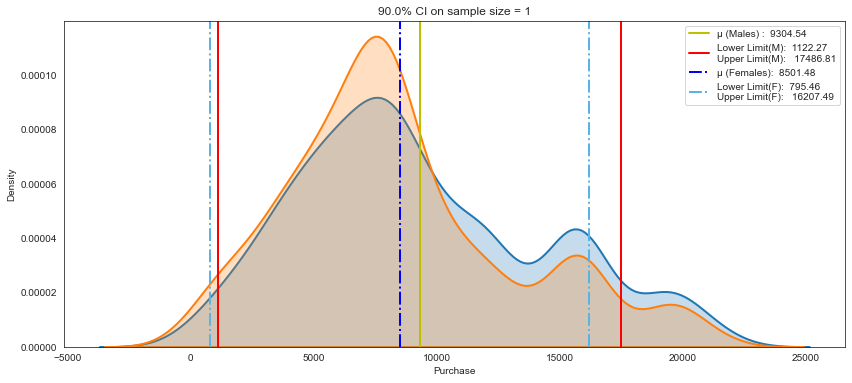

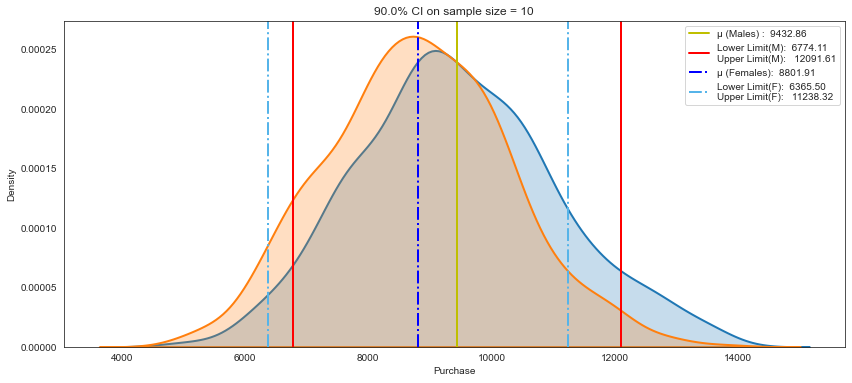

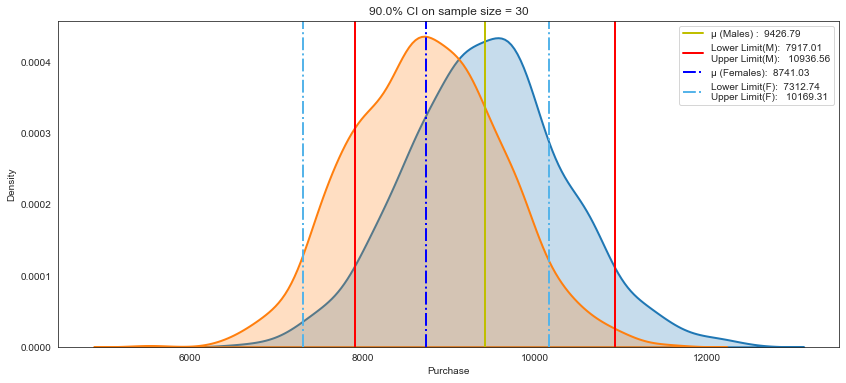

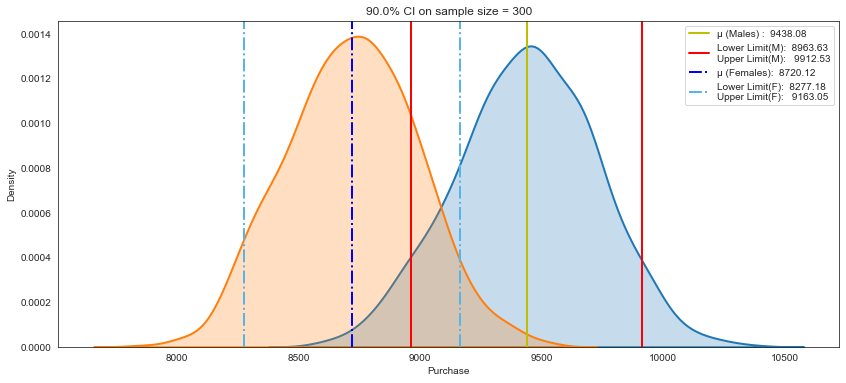

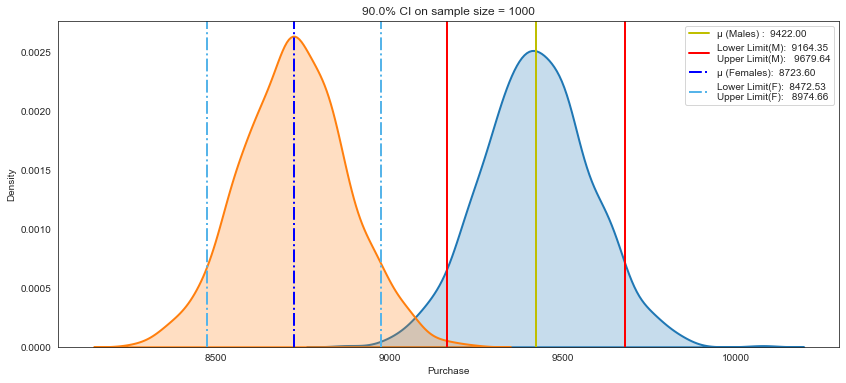

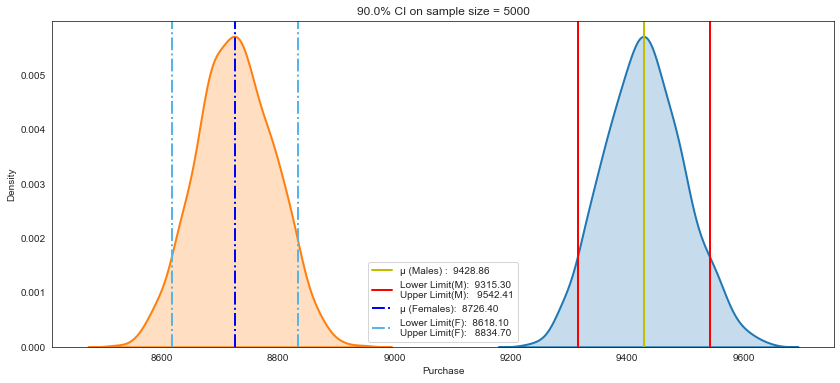

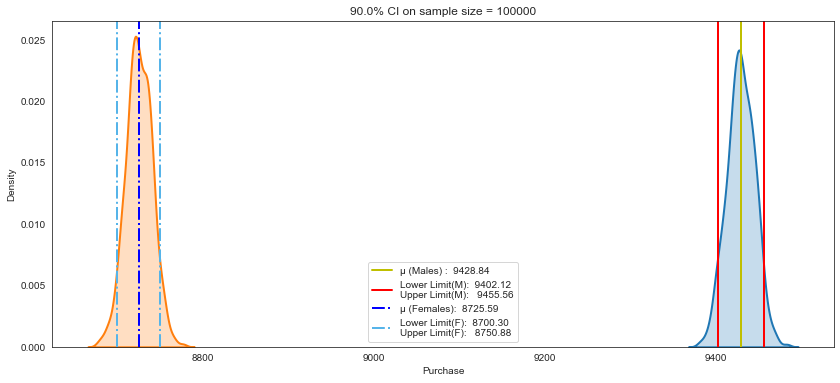

In [367]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 5000, 100000]
ci = 0.90

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping_gender_purchase(walmart_new_smp_male,walmart_new_smp_female,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['M', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),90]]), axis=0)
    array = np.append(array, np.array([['F', ll_f, ul_f, smp_siz, ([ll_f,ul_f]) ,(ul_f-ll_f),90]]), axis=0)

overlap = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

In [368]:
overlap.loc[(overlap["Gender"] == "M") & (overlap["Sample_Size"] > 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI   Range  \
8       M     9164.35     9679.64        1000  [9164.35, 9679.64]  515.29   
10      M      9315.3     9542.41        5000   [9315.3, 9542.41]  227.11   
12      M     9402.12     9455.56      100000  [9402.12, 9455.56]   53.44   

   Confidence_pct  
8              90  
10             90  
12             90

In [369]:
overlap.loc[(overlap["Gender"] == "F") & (overlap["Sample_Size"] > 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI   Range  \
9       F     8472.53     8974.66        1000  [8472.53, 8974.66]  502.13   
11      F      8618.1      8834.7        5000    [8618.1, 8834.7]   216.6   
13      F      8700.3     8750.88      100000   [8700.3, 8750.88]   50.58   

   Confidence_pct  
9              90  
11             90  
13             90

**`Insights`**

- As the sample size increases, the two groups start to become distinct

- With increasing sample size, Standard error of the mean in the samples decreases.

- For Female (sample size 100000) range for mean purchase with confidence interval 90% is [8702.35, 8751.09]

- For Male range for mean purchase with confidence interval 90% is [9402.28, 9455.2]

- There is no overlapping found

# Calculate 95% CI

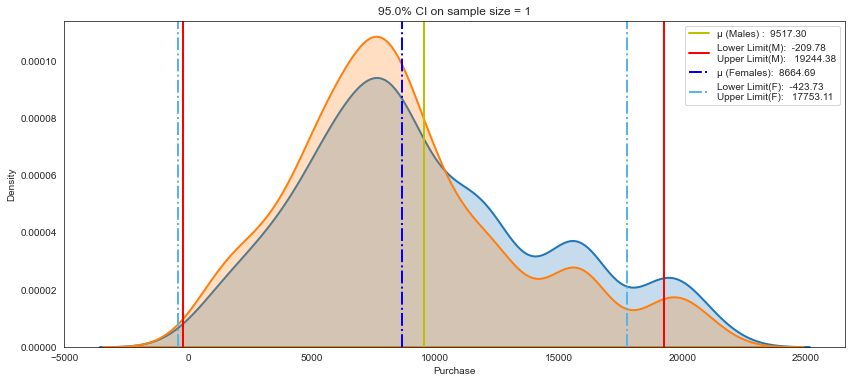

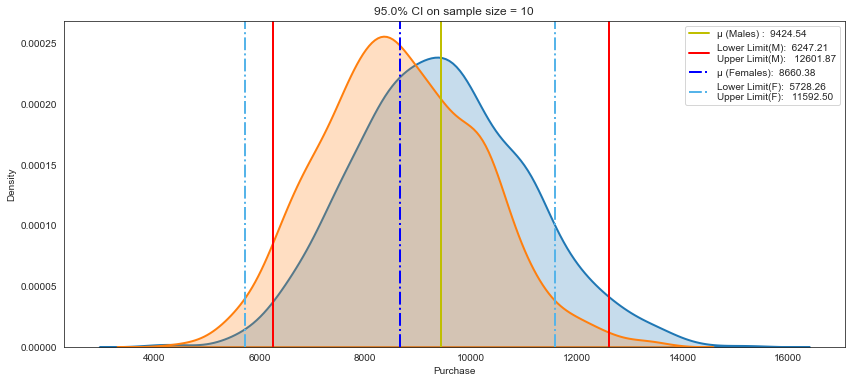

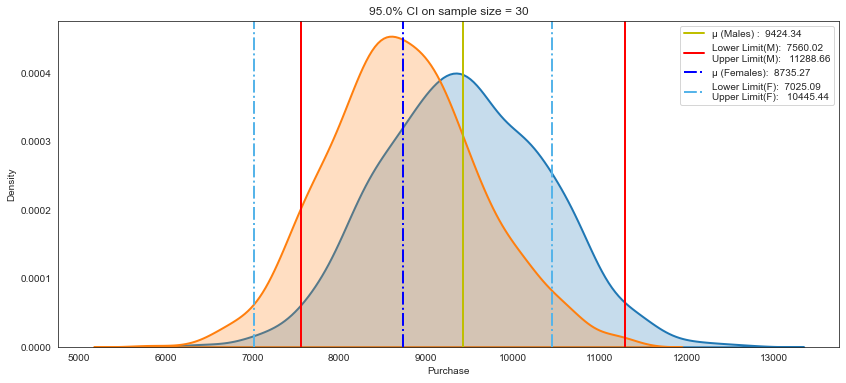

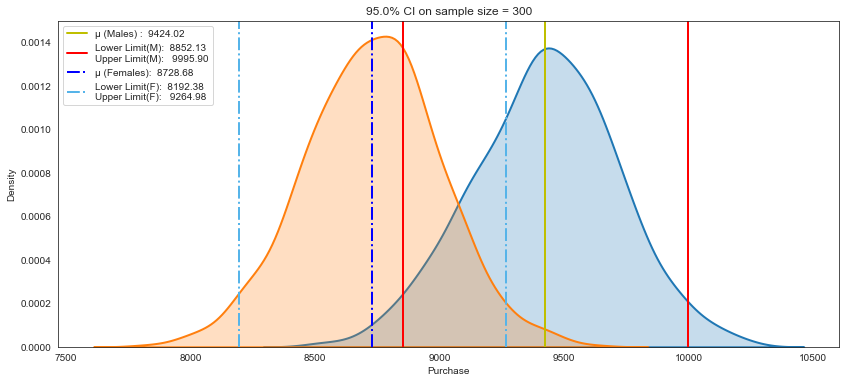

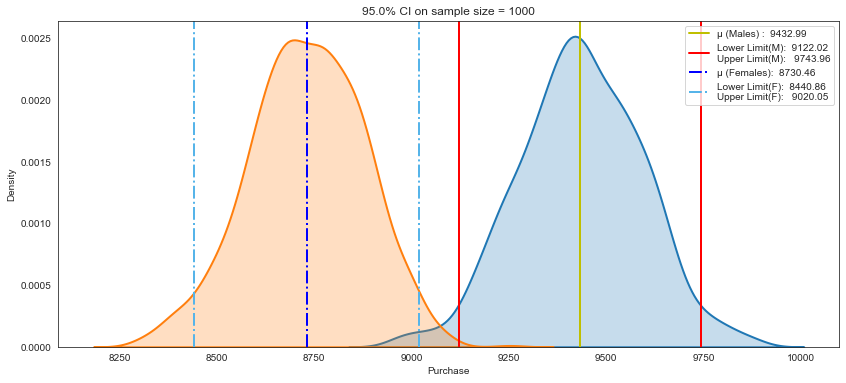

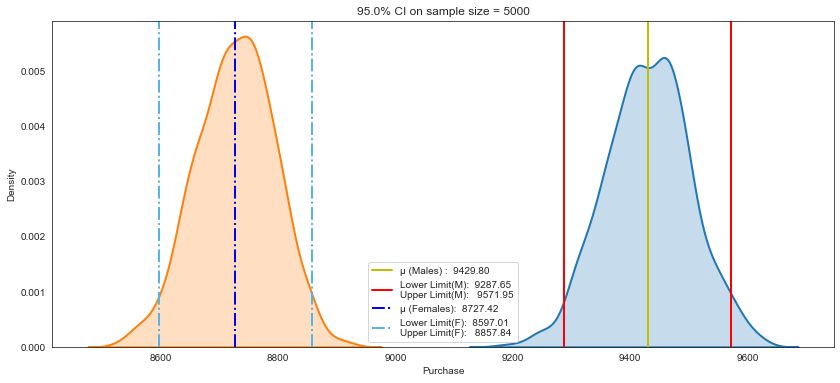

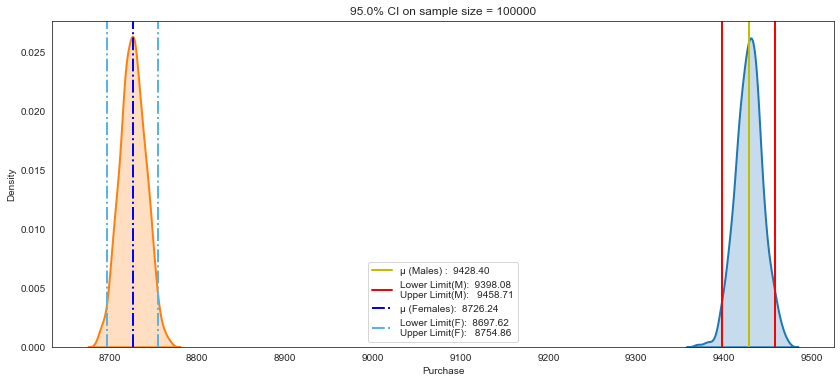

In [370]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 5000, 100000]
ci = 0.95

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping_gender_purchase(walmart_new_smp_male,walmart_new_smp_female,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['M', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),95]]), axis=0)
    array = np.append(array, np.array([['F', ll_f, ul_f, smp_siz, ([ll_f,ul_f]) ,(ul_f-ll_f),95]]), axis=0)

overlap = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

In [371]:
overlap.loc[(overlap["Gender"] == "M") & (overlap["Sample_Size"] > 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI   Range  \
8       M     9122.02     9743.96        1000  [9122.02, 9743.96]  621.94   
10      M     9287.65     9571.95        5000  [9287.65, 9571.95]   284.3   
12      M     9398.08     9458.71      100000  [9398.08, 9458.71]   60.63   

   Confidence_pct  
8              95  
10             95  
12             95

In [372]:
overlap.loc[(overlap["Gender"] == "F") & (overlap["Sample_Size"] > 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI   Range  \
9       F     8440.86     9020.05        1000  [8440.86, 9020.05]  579.19   
11      F     8597.01     8857.84        5000  [8597.01, 8857.84]  260.83   
13      F     8697.62     8754.86      100000  [8697.62, 8754.86]   57.24   

   Confidence_pct  
9              95  
11             95  
13             95

**`Insights`**
- Using confidence interval 95%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90%-

- As the sample size increases, the Male and female groups start to become distinct

- With increasing sample size, Standard error of the mean in the samples decreases. For sample size 100000 is 0.47

- For Female (sample size 100000) range for mean purchase with confidence interval 90% is [8695.0, 8755.56]	

- For Male range for mean purchase with confidence interval 95% is [9397.76, 9460.52]	

# Calculate 99% CI

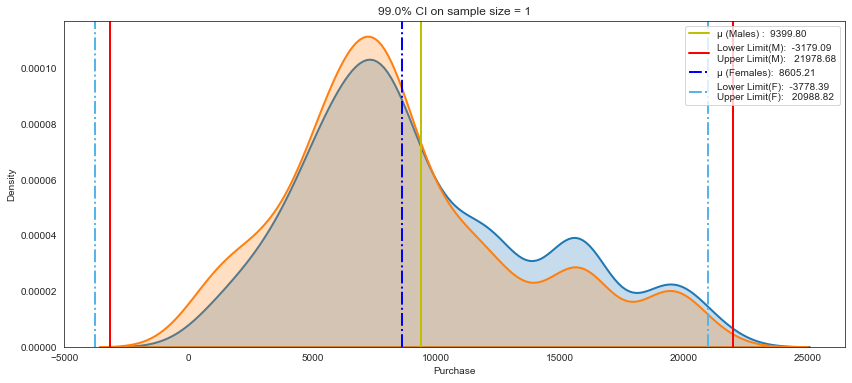

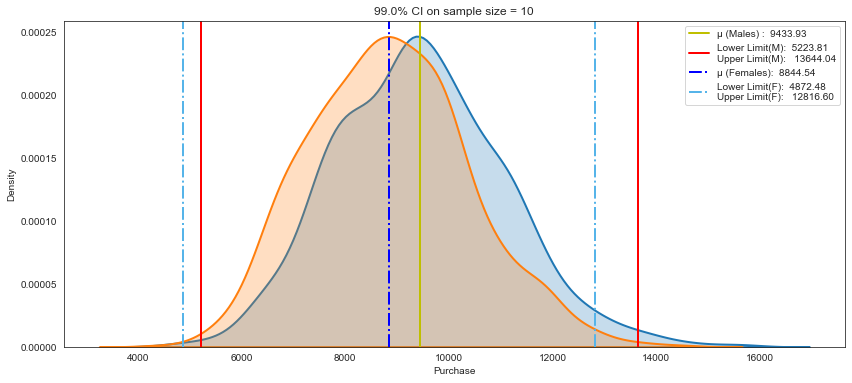

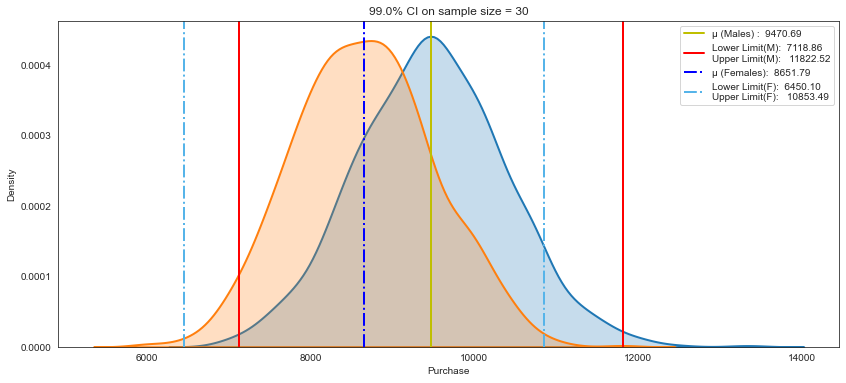

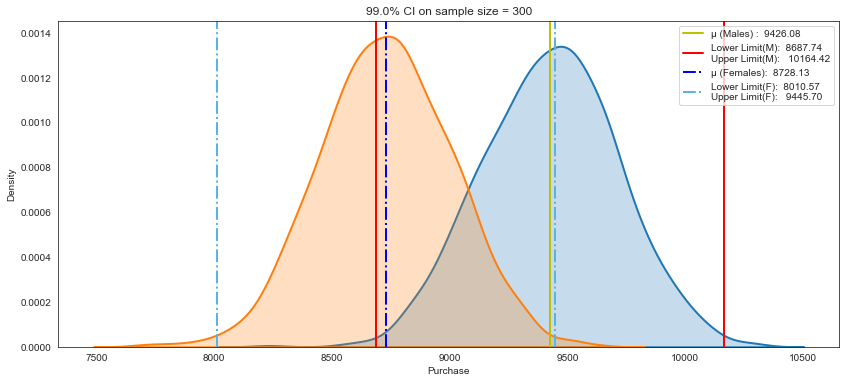

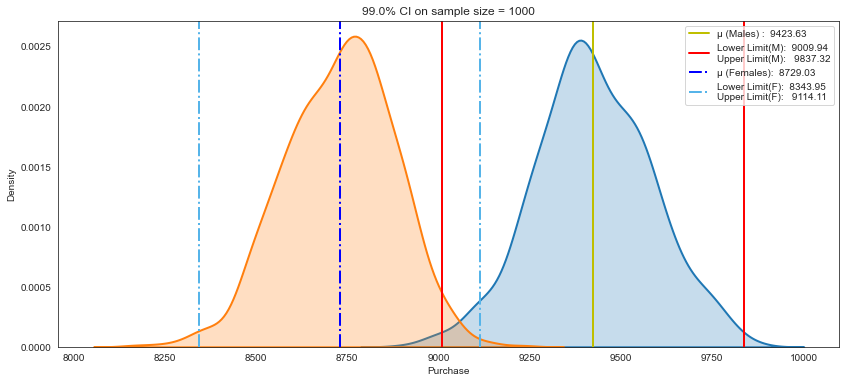

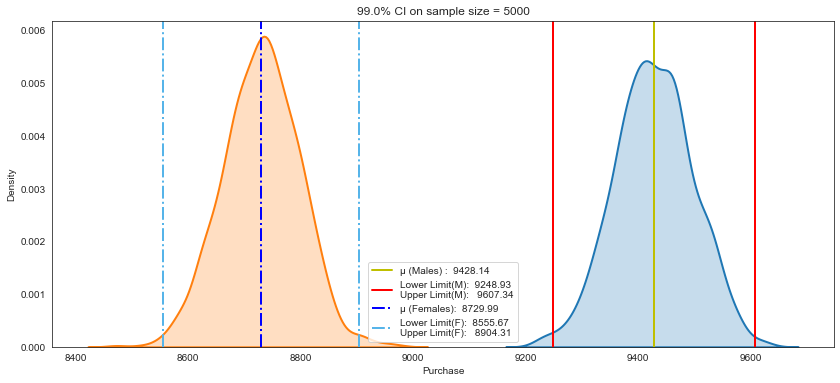

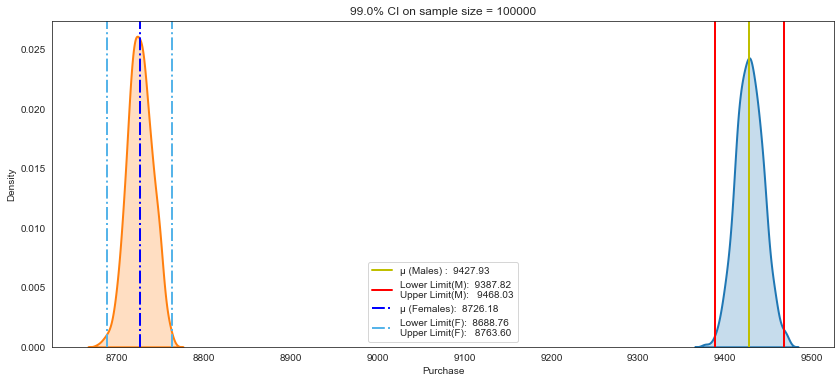

In [373]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 5000, 100000]
ci = 0.99

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping_gender_purchase(walmart_new_smp_male,walmart_new_smp_female,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['M', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),99]]), axis=0)
    array = np.append(array, np.array([['F', ll_f, ul_f, smp_siz, ([ll_f,ul_f]) ,(ul_f-ll_f),99]]), axis=0)

overlap = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

In [374]:
overlap.loc[(overlap["Gender"] == "M") & (overlap["Sample_Size"] > 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI   Range  \
8       M     9009.94     9837.32        1000  [9009.94, 9837.32]  827.38   
10      M     9248.93     9607.34        5000  [9248.93, 9607.34]  358.41   
12      M     9387.82     9468.03      100000  [9387.82, 9468.03]   80.21   

   Confidence_pct  
8              99  
10             99  
12             99

In [375]:
overlap.loc[(overlap["Gender"] == "F") & (overlap["Sample_Size"] > 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI   Range  \
9       F     8343.95     9114.11        1000  [8343.95, 9114.11]  770.16   
11      F     8555.67     8904.31        5000  [8555.67, 8904.31]  348.64   
13      F     8688.76      8763.6      100000   [8688.76, 8763.6]   74.84   

   Confidence_pct  
9              99  
11             99  
13             99

**`Insights`**
- Using confidence interval 99%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90% & 95%-

- As the sample size increases, the Male and female groups start to become distinct

- With increasing sample size, Standard error of the mean in the samples decreases. For sample size 100000 is 0.45

- For Female (sample size 100000) range for mean purchase with confidence interval 99% is [8688.31, 8763.93]	

- For Male range for mean purchase with confidence interval 90% is [9388.64, 9469.8]	

# 4.3 Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

# Answer

- **`Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.`**

- **`When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases. For Female Confidence percent as [90,95,99] have difference between the upper & lower limits as [50.46,59,73.31]`**

# Conclusion to make changes and improvements

- **`As per analysis that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday. `**

# 4.4 Results when the same activity is performed for Married vs Unmarried

In [376]:
walmart_new.groupby(["Marital_Status"])["Purchase"].describe()

count         mean          std   min     25%     50%  \
Marital_Status                                                             
0               324731.0  9257.517959  5005.287278  12.0  5605.0  8044.0   
1               225337.0  9251.430702  4991.196933  12.0  5843.0  8051.0   

                    75%      max  
Marital_Status                    
0               12061.0  21400.5  
1               12042.0  21400.5

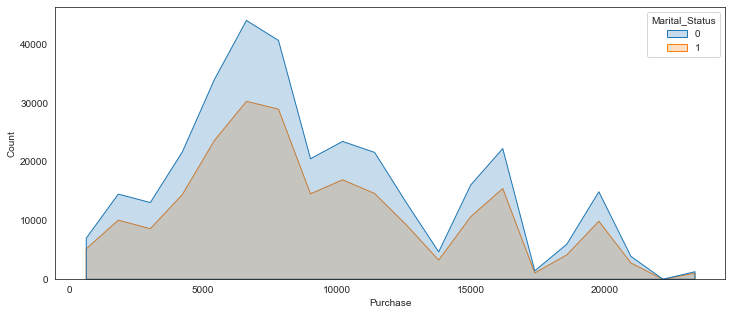

In [377]:
plt.figure(figsize = (12, 5))

sns.histplot(data = walmart, x = "Purchase", hue = "Marital_Status", element="poly", bins = 20)

plt.show()

**`Insights`**
- Single customers tends to purchase slightly more than married one

# Calculating CI (90%, 95%, 99%) using Bootstrapping for Puchases based on Marital_Status using CLT

In [378]:
def bootstrapping_marital_status(sample1,sample2,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):
    
    smp1_means_m = np.empty(itr_size)
    smp2_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp1_n = np.empty(smp_siz)
        smp2_n = np.empty(smp_siz)
        smp1_n = np.random.choice(sample1, size = smp_siz,replace=True)
        smp2_n = np.random.choice(sample2, size = smp_siz,replace=True)
        smp1_means_m[i] = np.mean(smp1_n)
        smp2_means_m[i] = np.mean(smp2_n)

#     std_dev1 = np.std(sample1)
#     std_err1 = np.std(sample1,ddof=1)/np.sqrt(smp_siz)
#     std_dev2 = np.std(sample2)
#     std_err2 = np.std(sample2,ddof=1)/np.sqrt(smp_siz)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(smp1_means_m)
    sigma1 = statistics.stdev(smp1_means_m)
    sem1   = stats.sem(smp1_means_m)
    
    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)
    
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(smp2_means_m)
    sigma2 = statistics.stdev(smp2_means_m)
    sem2   = stats.sem(smp2_means_m)

#     print(smp_siz,std_dev1,std_err1,sem1)
#     print(smp_siz,std_dev2,std_err2,sem2)
    
    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)
        
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("white")
    
    sns.kdeplot(data=smp1_means_m,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=smp2_means_m,color='#e5ae38',fill=True,linewidth=2)
    
    label_mean1=("μ (Married) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit1,upper_limit1))
    label_mean2=("μ (Unmarried):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit2,upper_limit2))
    
    plt.title(f"{confidence_level*100}% CI on Sample Size = {smp_siz}")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    
    return smp1_means_m,smp2_means_m ,np.round(lower_limit1,2),np.round(upper_limit1,2),np.round(lower_limit2,2),np.round(upper_limit2,2)

In [379]:
walmart_new_smp_married = walmart.loc[walmart_new["Marital_Status"] == 1]["Purchase"]
walmart_new_smp_unmarried = walmart.loc[walmart_new["Marital_Status"] == 0]["Purchase"]

print(f"Married Customers: {walmart_new_smp_married.shape[0]}\nUnmarried Customers: {walmart_new_smp_unmarried[0]}")

Married Customers: 225337
Unmarried Customers: 8370


**`Insights`**
- Infact most of the customers are married but the single customer tends to purchase more than married one

# Calculating 90% CI

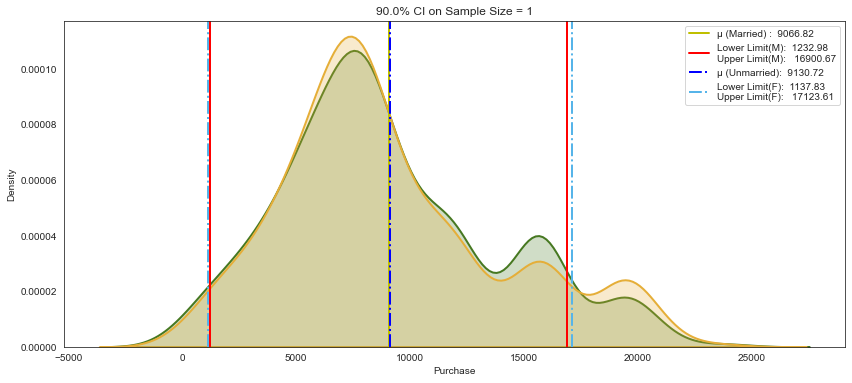

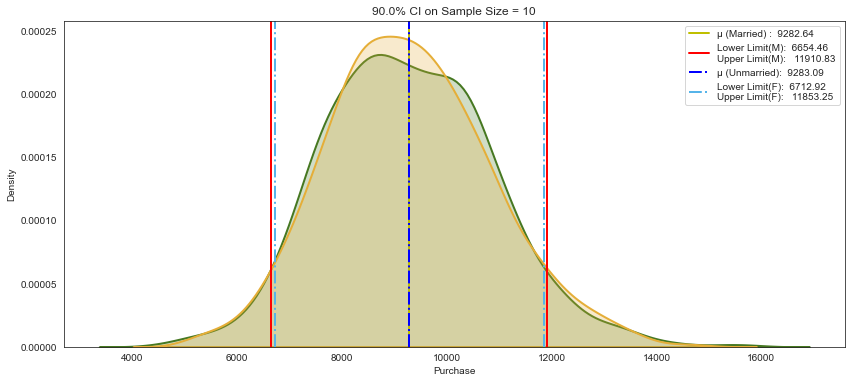

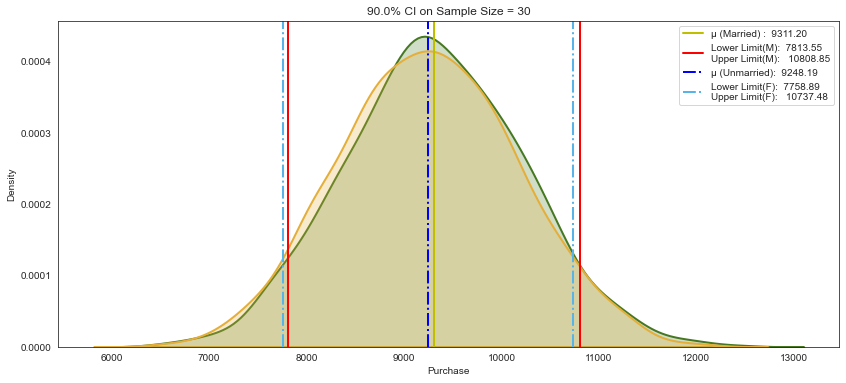

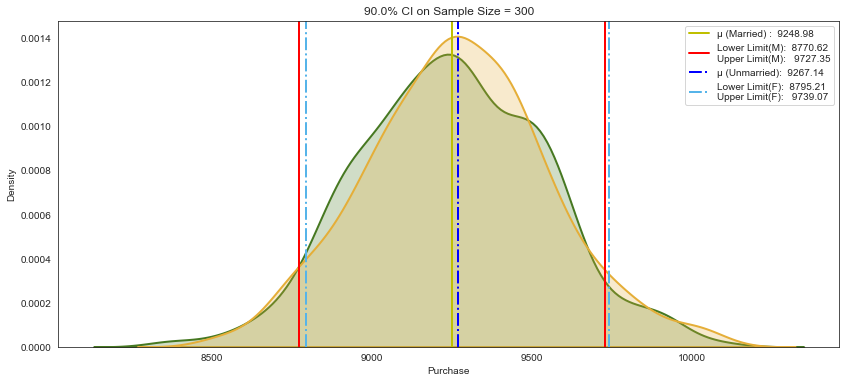

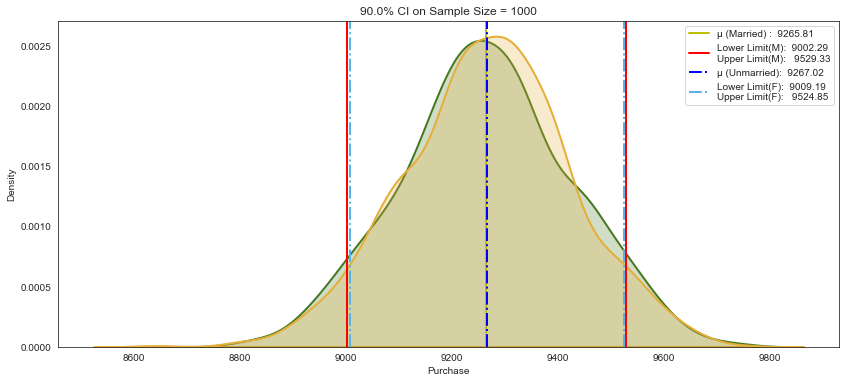

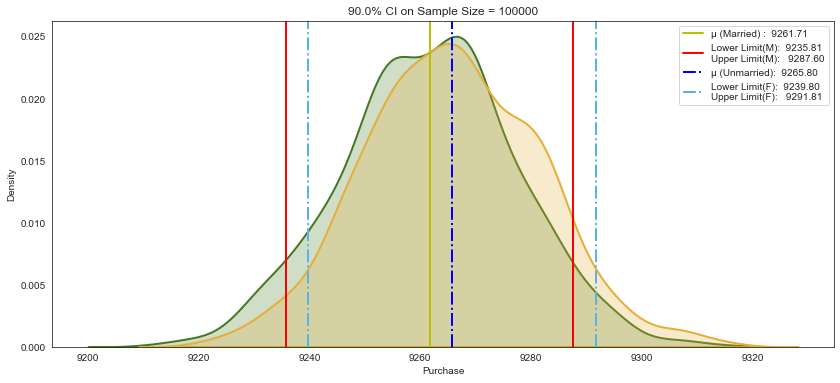

In [380]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.90

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_u, ul_u = bootstrapping_marital_status(walmart_new_smp_married,walmart_new_smp_unmarried,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['Married', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),90]]), axis=0)
    array = np.append(array, np.array([['Unmarried', ll_u, ul_u, smp_siz, ([ll_u,ul_u]) ,(ul_u-ll_u),90]]), axis=0)

overlap = pd.DataFrame(array, columns = ['Marital_Status','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

In [381]:
overlap.loc[(overlap["Marital_Status"] == "Married") & (overlap["Sample_Size"] >= 300)]

Marital_Status Lower_limit Upper_limit Sample_Size                  CI  \
6         Married     8770.62     9727.35         300  [8770.62, 9727.35]   
8         Married     9002.29     9529.33        1000  [9002.29, 9529.33]   
10        Married     9235.81      9287.6      100000   [9235.81, 9287.6]   

     Range Confidence_pct  
6   956.73             90  
8   527.04             90  
10   51.79             90

In [382]:
overlap.loc[(overlap["Marital_Status"] == "Unmarried") & (overlap["Sample_Size"] >= 300)]

Marital_Status Lower_limit Upper_limit Sample_Size                  CI  \
7       Unmarried     8795.21     9739.07         300  [8795.21, 9739.07]   
9       Unmarried     9009.19     9524.85        1000  [9009.19, 9524.85]   
11      Unmarried      9239.8     9291.81      100000   [9239.8, 9291.81]   

     Range Confidence_pct  
7   943.86             90  
9   515.66             90  
11   52.01             90

**`Insights`**

- For Unmarried customer (sample size 100000) range for mean purchase with confidence interval 90% is [9240.36, 9290.87]		

- For married customer range for mean purchase with confidence interval 90% is [9233.54, 9288.07]

# Calculating 95% CI

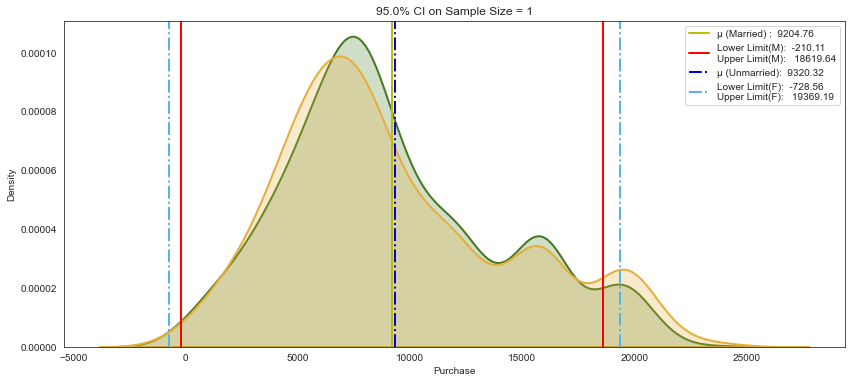

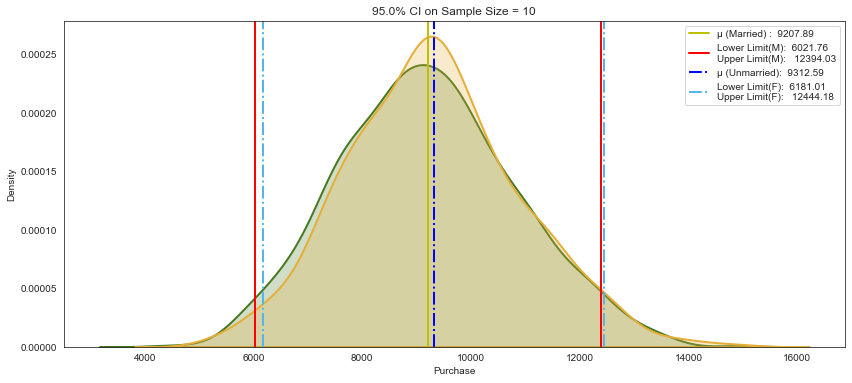

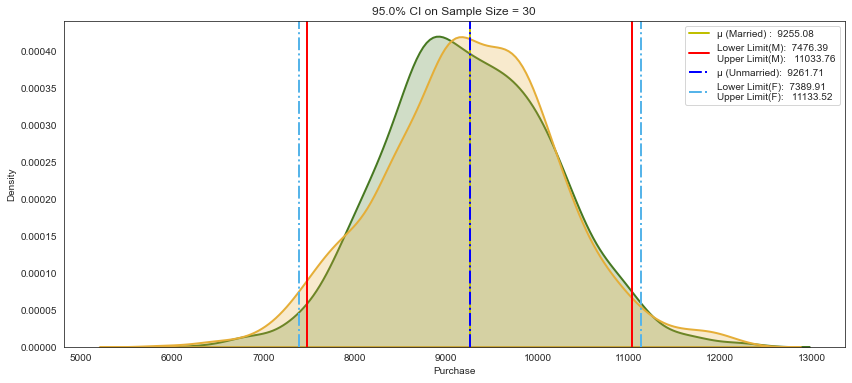

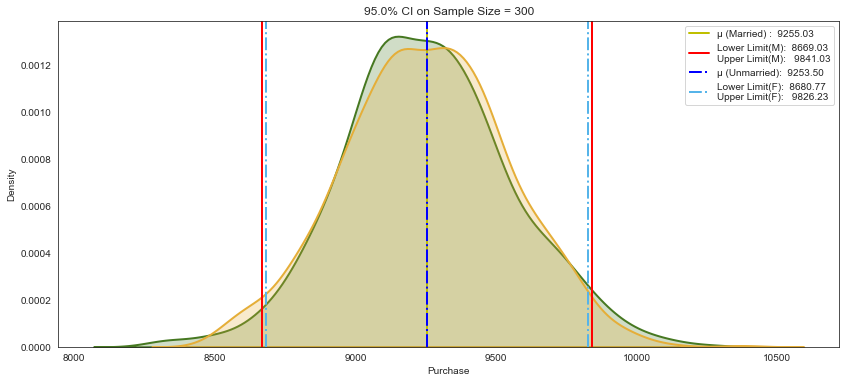

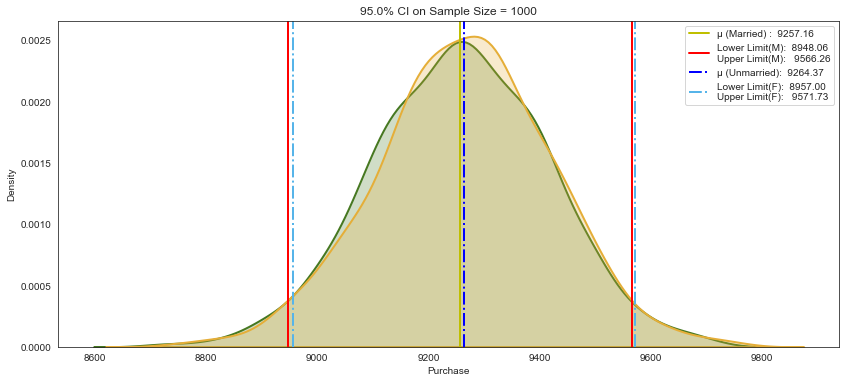

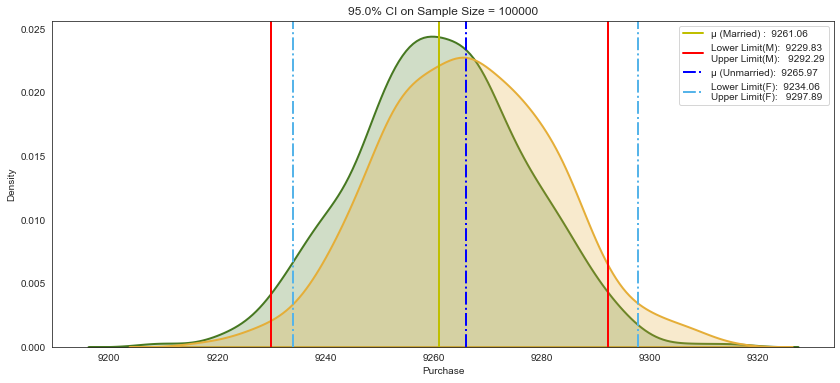

In [383]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.95

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_u, ul_u = bootstrapping_marital_status(walmart_new_smp_married,walmart_new_smp_unmarried,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['Married', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),95]]), axis=0)
    array = np.append(array, np.array([['Unmarried', ll_u, ul_u, smp_siz, ([ll_u,ul_u]) ,(ul_u-ll_u),95]]), axis=0)

overlap = pd.DataFrame(array, columns = ['Marital_Status','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

In [384]:
overlap.loc[(overlap["Marital_Status"] == "Married") & (overlap["Sample_Size"] >= 300)]

Marital_Status Lower_limit Upper_limit Sample_Size                  CI  \
6         Married     8669.03     9841.03         300  [8669.03, 9841.03]   
8         Married     8948.06     9566.26        1000  [8948.06, 9566.26]   
10        Married     9229.83     9292.29      100000  [9229.83, 9292.29]   

     Range Confidence_pct  
6   1172.0             95  
8    618.2             95  
10   62.46             95

In [385]:
overlap.loc[(overlap["Marital_Status"] == "Unmarried") & (overlap["Sample_Size"] >= 300)]

Marital_Status Lower_limit Upper_limit Sample_Size                  CI  \
7       Unmarried     8680.77     9826.23         300  [8680.77, 9826.23]   
9       Unmarried      8957.0     9571.73        1000   [8957.0, 9571.73]   
11      Unmarried     9234.06     9297.89      100000  [9234.06, 9297.89]   

      Range Confidence_pct  
7   1145.46             95  
9    614.73             95  
11    63.83             95

**`Insights`**

- For Unmarried customer (sample size 100000) range for mean purchase with confidence interval 95% is [9234.75, 9297.58]		

- For married customer range for mean purchase with confidence interval 95% is [9230.34, 9293.32]	

# Calculating 99% CI

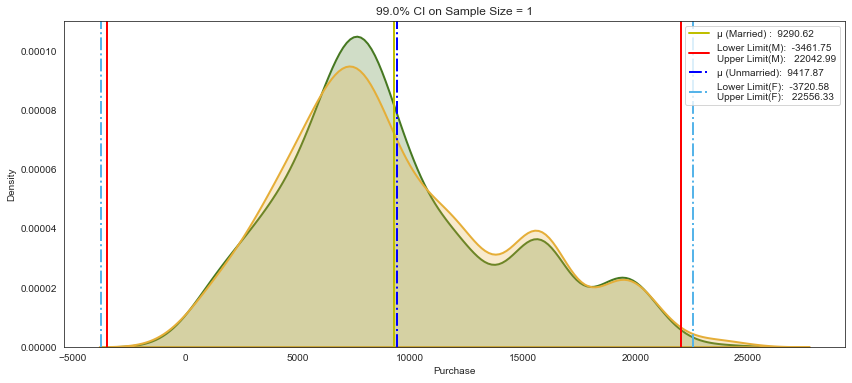

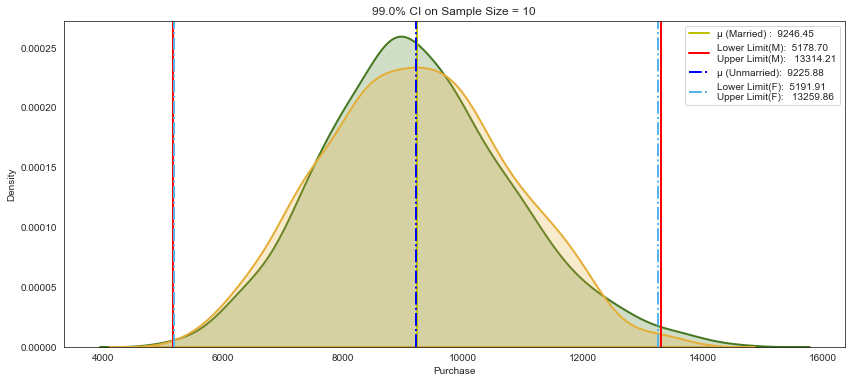

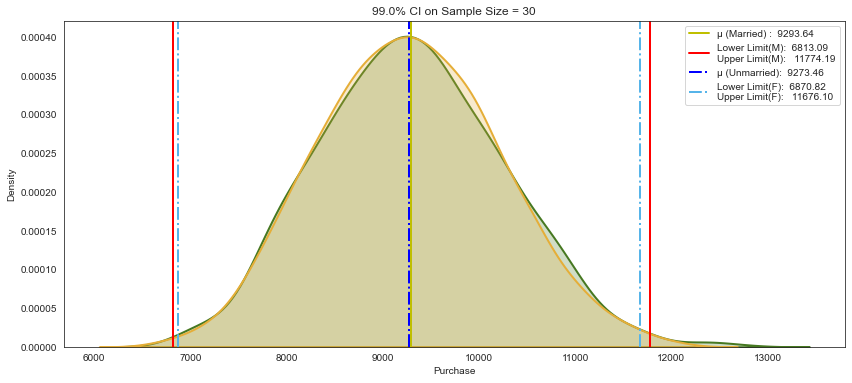

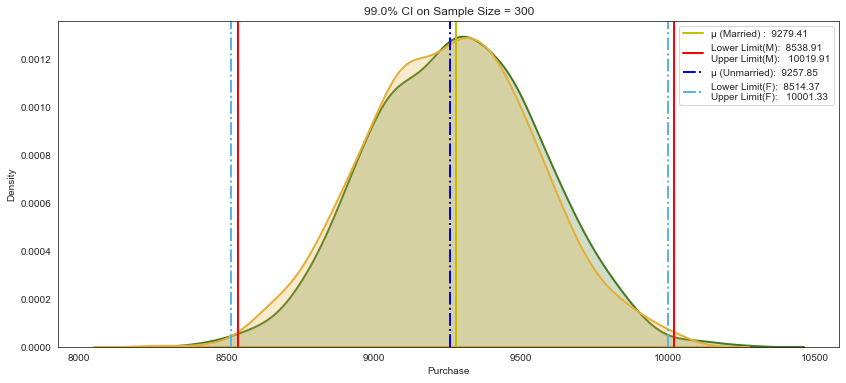

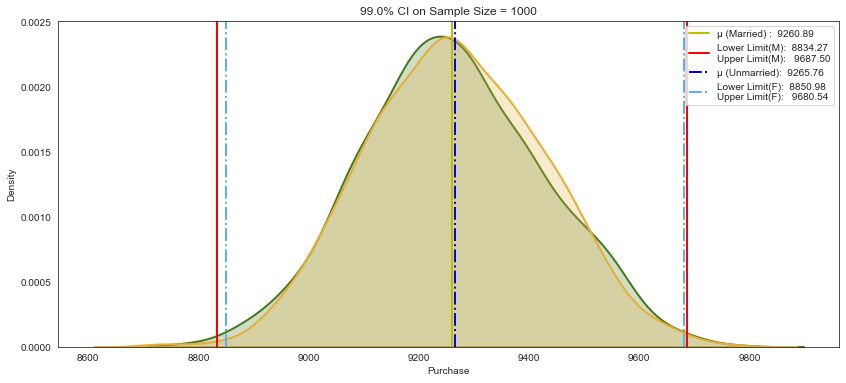

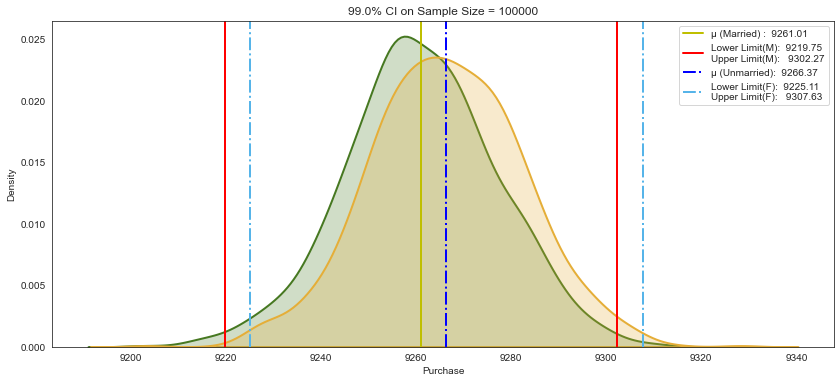

In [386]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.99

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_u, ul_u = bootstrapping_marital_status(walmart_new_smp_married,walmart_new_smp_unmarried,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['Married', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),99]]), axis=0)
    array = np.append(array, np.array([['Unmarried', ll_u, ul_u, smp_siz, ([ll_u,ul_u]) ,(ul_u-ll_u),99]]), axis=0)

overlap = pd.DataFrame(array, columns = ['Marital_Status','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

In [387]:
overlap.loc[(overlap["Marital_Status"] == "Married") & (overlap["Sample_Size"] >= 300)]

Marital_Status Lower_limit Upper_limit Sample_Size                   CI  \
6         Married     8538.91    10019.91         300  [8538.91, 10019.91]   
8         Married     8834.27      9687.5        1000    [8834.27, 9687.5]   
10        Married     9219.75     9302.27      100000   [9219.75, 9302.27]   

     Range Confidence_pct  
6   1481.0             99  
8   853.23             99  
10   82.52             99

In [388]:
overlap.loc[(overlap["Marital_Status"] == "Unmarried") & (overlap["Sample_Size"] >= 300)]

Marital_Status Lower_limit Upper_limit Sample_Size                   CI  \
7       Unmarried     8514.37    10001.33         300  [8514.37, 10001.33]   
9       Unmarried     8850.98     9680.54        1000   [8850.98, 9680.54]   
11      Unmarried     9225.11     9307.63      100000   [9225.11, 9307.63]   

      Range Confidence_pct  
7   1486.96             99  
9    829.56             99  
11    82.52             99

**`Insights`**

- For Unmarried customer (sample size 100000) range for mean purchase with confidence interval 99% is [9225.71, 9305.43]	

- For married customer range for mean purchase with confidence interval 99% is [9218.62, 9303.25]

# Major Inferences

- **`Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married. `**

# 4.5 Results when the same activity is performed for Age

In [389]:
walmart_new.groupby(["Age"])["Purchase"].describe()

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8925.539597  5090.078414  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9164.189554  5019.866472  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9244.947060  4990.086124  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9320.888550  4995.487782  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9198.531093  4940.249496  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9519.560427  5048.447704  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9319.768741  4968.014656  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   21400.5  
18-25  21400.5  
26-35  21400.5  
36-45  21400.5  
46-50  21400.5  
51-55  21400.5  
55+    21400.5

In [390]:
age_dict = {}
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 
for i in range(len(age_data)):
    age_dict[age_list[i]] = age_data.loc[i, "Mean"]

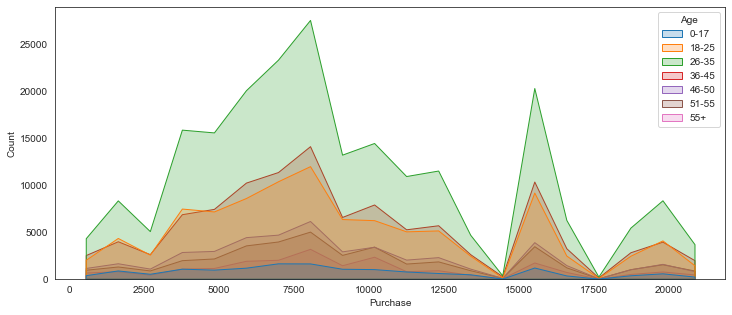

In [391]:
plt.figure(figsize = (12, 5))

sns.histplot(data = walmart_new, x = "Purchase", bins = 20, hue = "Age", element="poly")
plt.show()

# Calculate CI (90%, 95%, 99%) for purchase based on age using CLT

In [392]:
def bootstrapping_age(sample,smp_siz=500,itr_size=5000,confidence_level=0.95,age= "0-17", no_of_tails=2):
    
    smp_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp_n = np.empty(smp_siz)
        smp_n = np.random.choice(sample, size = smp_siz,replace=True)
        smp_means_m[i] = np.mean(smp_n)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean  = np.mean(smp_means_m)
    sigma = statistics.stdev(smp_means_m)
    sem   = stats.sem(smp_means_m)
    
    lower_limit = mean - (z_critical * sigma)
    upper_limit = mean + (z_critical * sigma)
       
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp_means_m,color="#7A68A6",fill=True,linewidth=2)
    
    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))
    
    plt.title(f"{confidence_level * 100} CI on sample size {smp_siz} on age bracket {age}")
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    
    return smp_means_m ,np.round(lower_limit,2),np.round(upper_limit,2)

# Calculating 90% CI

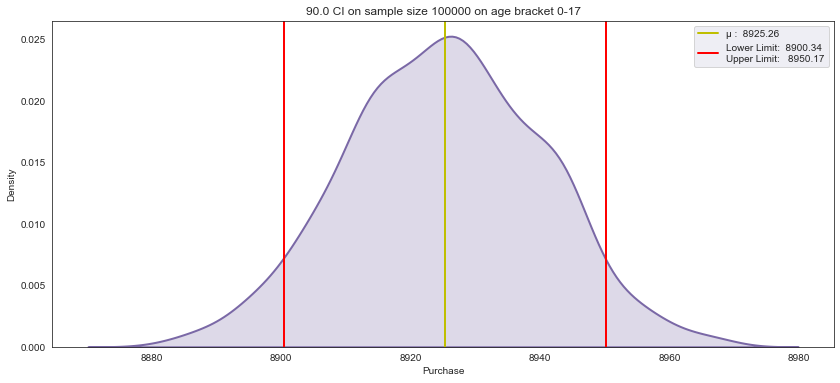

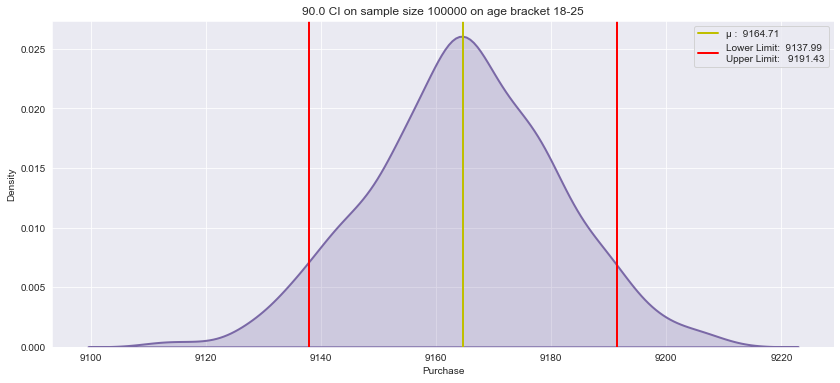

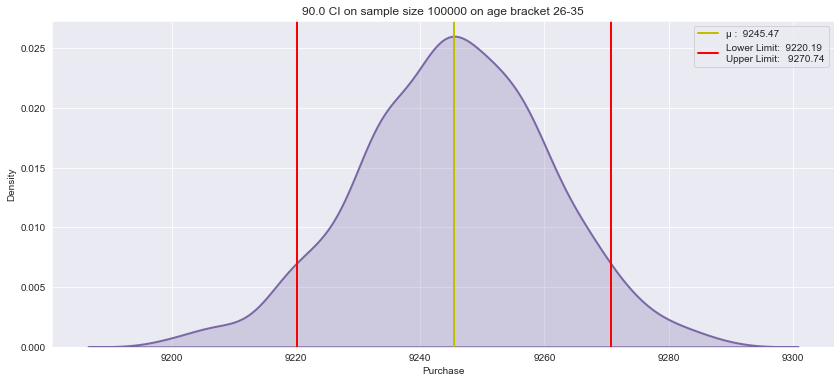

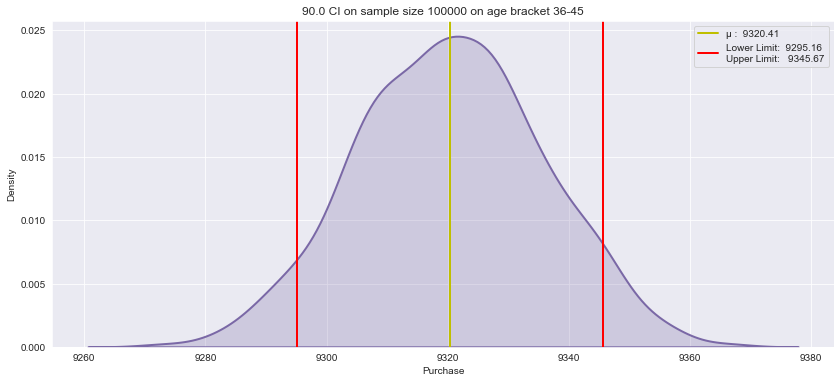

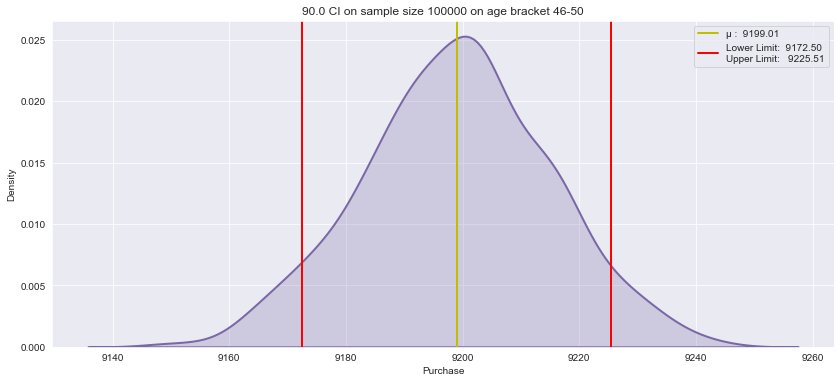

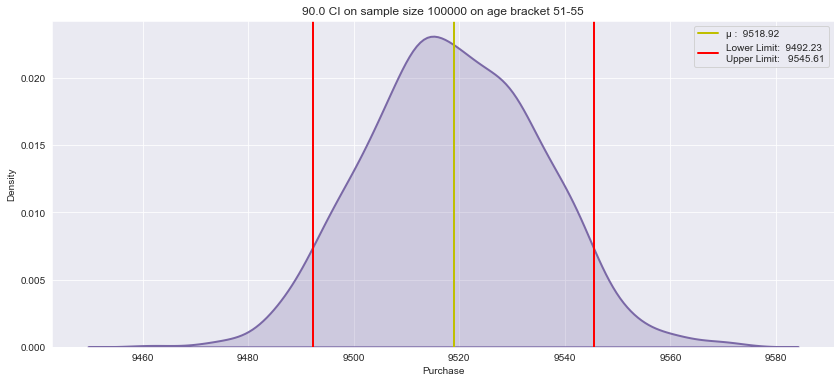

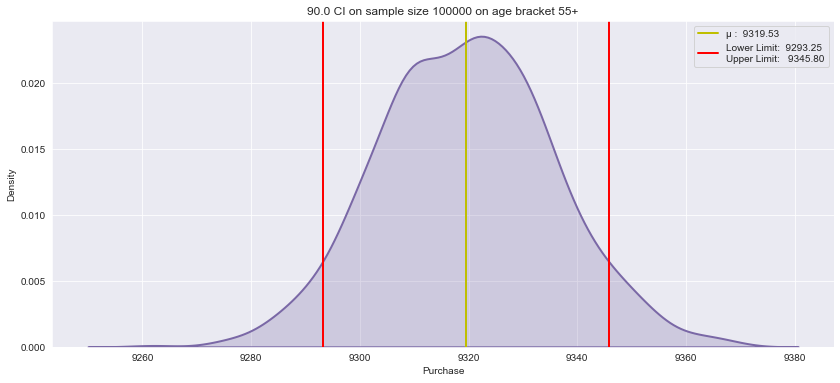

In [393]:
itr_size = 1000
smp_size = 10000
ci = 0.90
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 

array = np.empty((0,8))

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(walmart_new[walmart_new['Age'] == age]['Purchase'],smp_siz,itr_size,ci, age)

    array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),90]]), axis=0)

age_data = pd.DataFrame(array, columns = ['Age_Group','Mean','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

# Checking the Sampling distribution of a sample mean for each Age Group for 90% CI

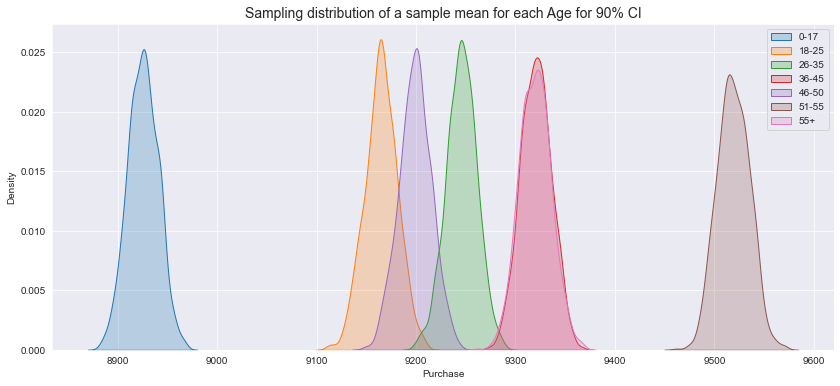

In [394]:
age_dict = {}
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 
for i in range(len(age_data)):
    age_dict[age_list[i]] = age_data.loc[i, "Mean"]
    
fig, ax = plt.subplots(figsize=(14,6))
sns.set_style("darkgrid")
for label_val in age_dict.keys():
    sns.kdeplot(age_dict[label_val], shade = True, label = label_val)

plt.title("Sampling distribution of a sample mean for each Age for 90% CI",fontsize=14)
plt.xlabel('Purchase')
plt.legend(loc='upper right')

plt.show()

In [395]:
age_data.head(10)

Age_Group                                               Mean Lower_limit  \
0      0-17  [8921.07, 8898.77, 8933.32, 8913.07, 8904.41, ...     8900.34   
1     18-25  [9157.02, 9158.03, 9161.95, 9183.78, 9189.99, ...     9137.99   
2     26-35  [9230.83, 9223.26, 9219.53, 9217.66, 9223.16, ...     9220.19   
3     36-45  [9305.09, 9294.65, 9317.86, 9347.28, 9310.44, ...     9295.16   
4     46-50  [9189.98, 9218.8, 9227.95, 9200.77, 9204.56, 9...      9172.5   
5     51-55  [9499.06, 9511.25, 9529.74, 9494.16, 9536.69, ...     9492.23   
6       55+  [9333.85, 9329.83, 9340.29, 9322.34, 9318.09, ...     9293.25   

  Upper_limit Sample_Size                  CI  Range Confidence_pct  
0     8950.17      100000  [8900.34, 8950.17]  49.83             90  
1     9191.43      100000  [9137.99, 9191.43]  53.44             90  
2     9270.74      100000  [9220.19, 9270.74]  50.55             90  
3     9345.67      100000  [9295.16, 9345.67]  50.51             90  
4     9225.51      100000   [9172.5, 9225.51]  53.01             90  
5     9545.61      100000  [9492.23, 9545.61]  53.38             90  
6      9345.8      100000   [9293.25, 9345.8]  52.55             90

# Calculating 95% CI

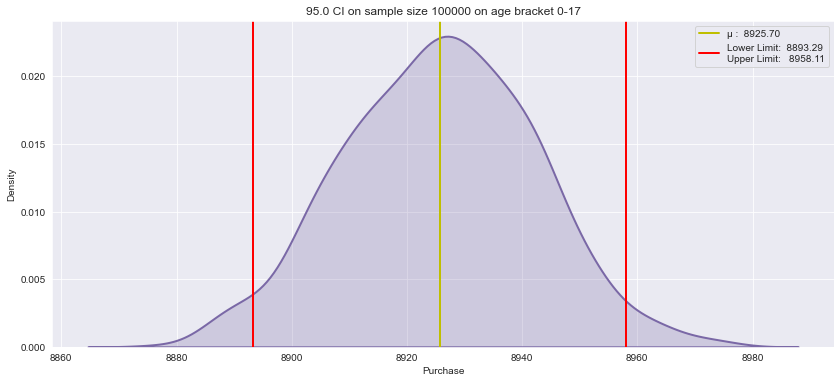

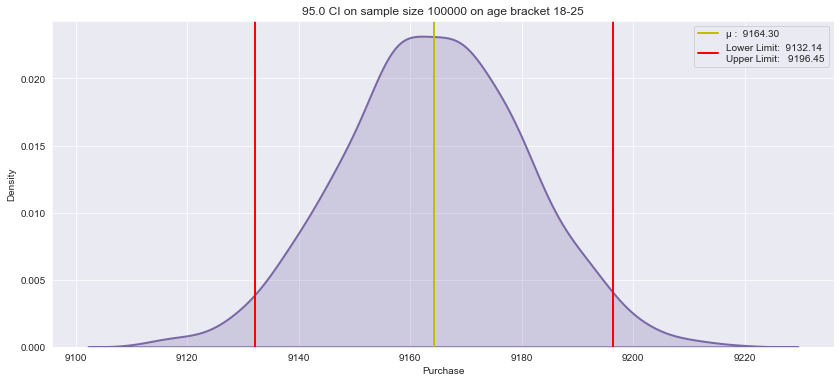

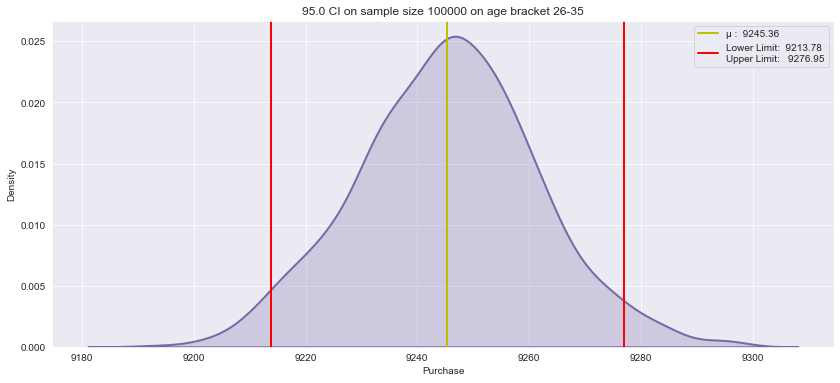

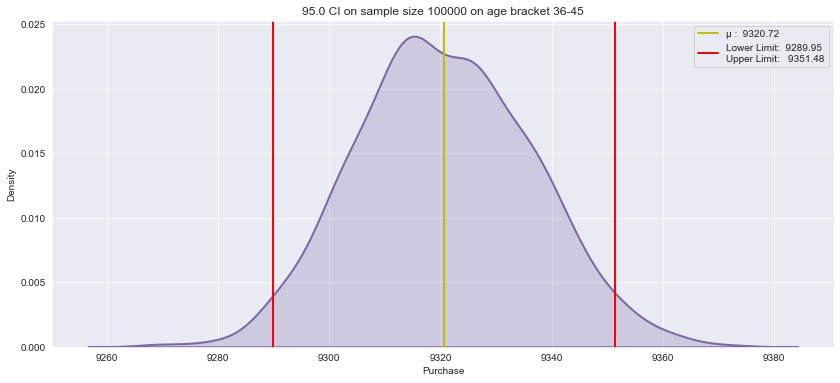

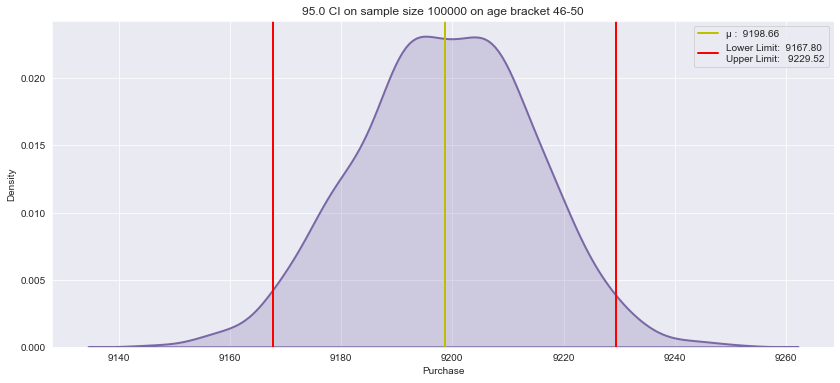

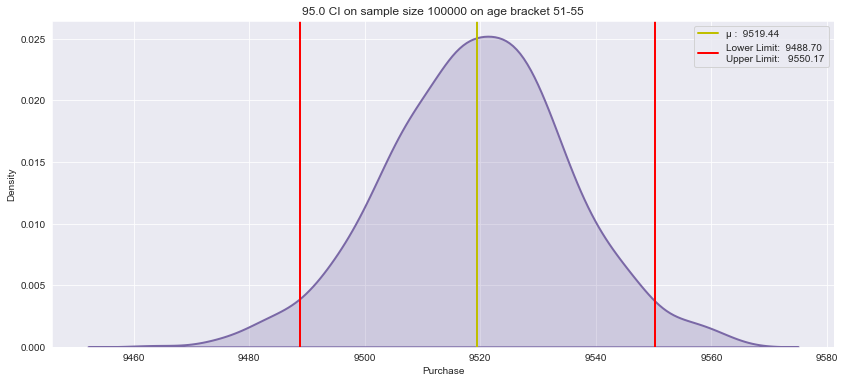

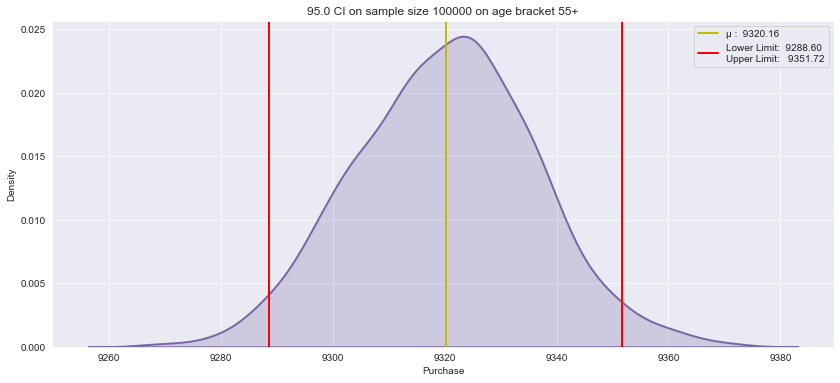

In [396]:
itr_size = 1000
smp_size = 10000
ci = 0.95
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 

array = np.empty((0,8))

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(walmart_new[walmart_new['Age'] == age]['Purchase'],smp_siz,itr_size,ci, age)

    array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),95]]), axis=0)

age_data = pd.DataFrame(array, columns = ['Age_Group','Mean','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

# Checking the Sampling distribution of a sample mean for each Age Group for 95% CI

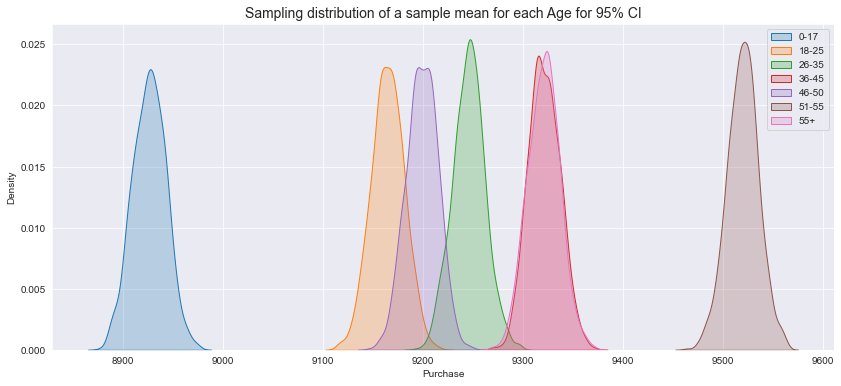

In [397]:
age_dict = {}
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 
for i in range(len(age_data)):
    age_dict[age_list[i]] = age_data.loc[i, "Mean"]
    
fig, ax = plt.subplots(figsize=(14,6))
sns.set_style("darkgrid")
for label_val in age_dict.keys():
    sns.kdeplot(age_dict[label_val], shade = True, label = label_val)

plt.title("Sampling distribution of a sample mean for each Age for 95% CI",fontsize=14)
plt.xlabel('Purchase')
plt.legend(loc='upper right')

plt.show()

In [398]:
age_data.head(7)

Age_Group                                               Mean Lower_limit  \
0      0-17  [8947.82, 8925.8, 8941.07, 8906.85, 8907.77, 8...     8893.29   
1     18-25  [9172.1, 9200.78, 9146.31, 9162.68, 9172.56, 9...     9132.14   
2     26-35  [9257.32, 9252.5, 9245.57, 9231.2, 9243.94, 92...     9213.78   
3     36-45  [9315.67, 9319.99, 9316.51, 9320.11, 9354.37, ...     9289.95   
4     46-50  [9193.01, 9190.69, 9215.66, 9193.71, 9222.82, ...      9167.8   
5     51-55  [9504.03, 9516.17, 9513.81, 9519.95, 9534.72, ...      9488.7   
6       55+  [9313.41, 9309.1, 9309.73, 9347.08, 9334.2, 93...      9288.6   

  Upper_limit Sample_Size                  CI  Range Confidence_pct  
0     8958.11      100000  [8893.29, 8958.11]  64.82             95  
1     9196.45      100000  [9132.14, 9196.45]  64.31             95  
2     9276.95      100000  [9213.78, 9276.95]  63.17             95  
3     9351.48      100000  [9289.95, 9351.48]  61.53             95  
4     9229.52      100000   [9167.8, 9229.52]  61.72             95  
5     9550.17      100000   [9488.7, 9550.17]  61.47             95  
6     9351.72      100000   [9288.6, 9351.72]  63.12             95

# Calculating 99% CI

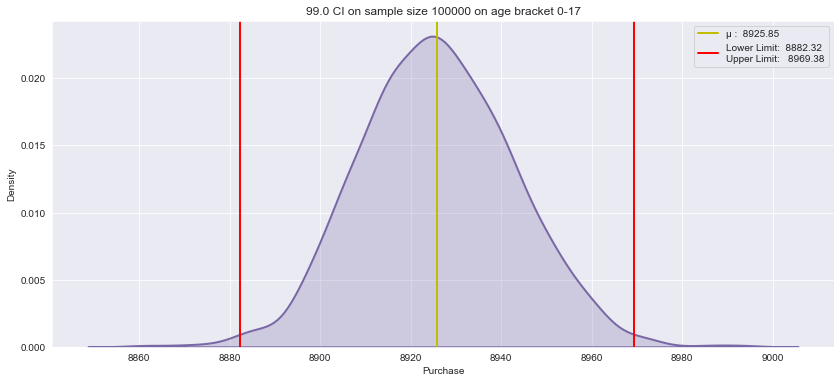

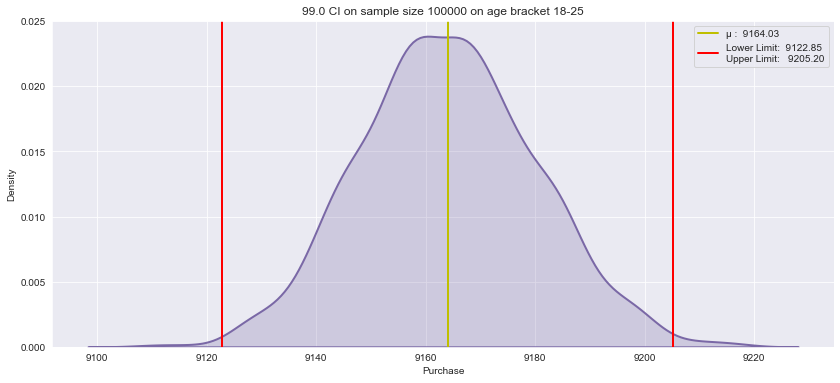

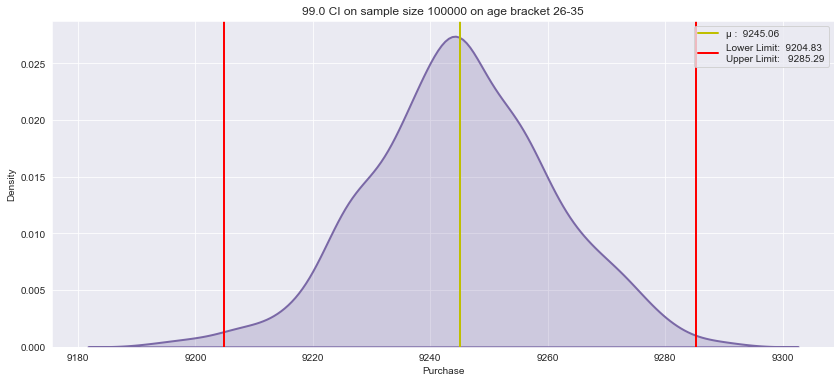

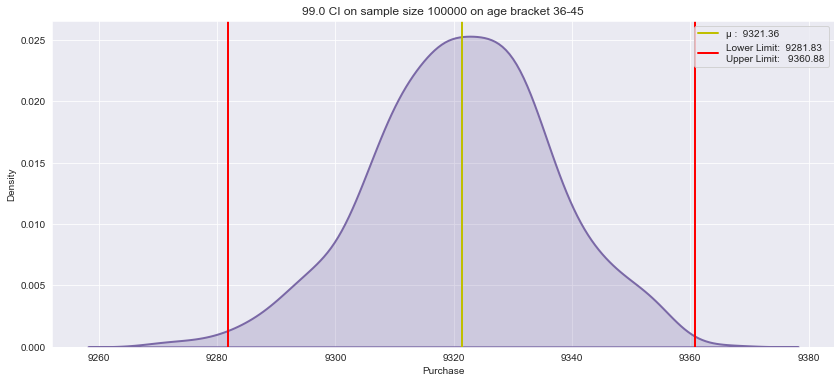

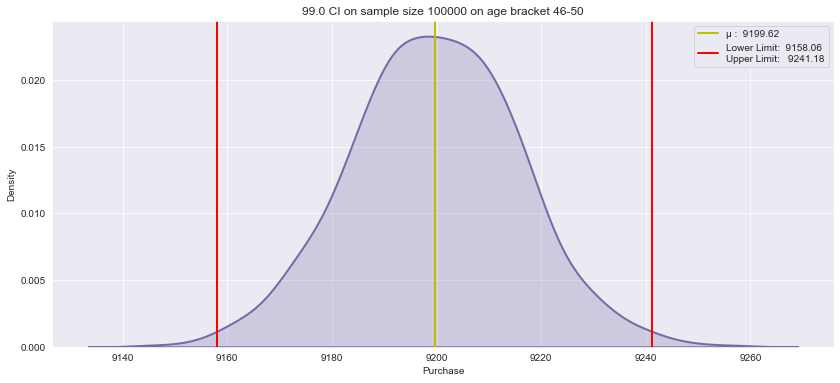

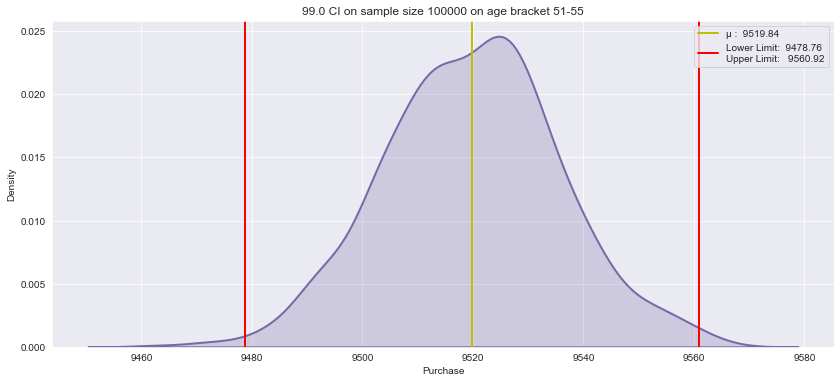

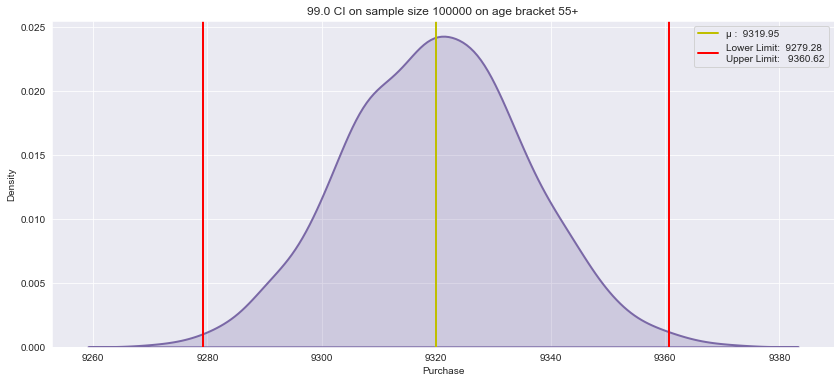

In [399]:
itr_size = 1000
smp_size = 10000
ci = 0.99
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 

array = np.empty((0,8))

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(walmart_new[walmart_new['Age'] == age]['Purchase'],smp_siz,itr_size,ci, age)

    array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),99]]), axis=0)

age_data = pd.DataFrame(array, columns = ['Age_Group','Mean','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

# Checking the Sampling distribution of a sample mean for each Age Group for 99% CI

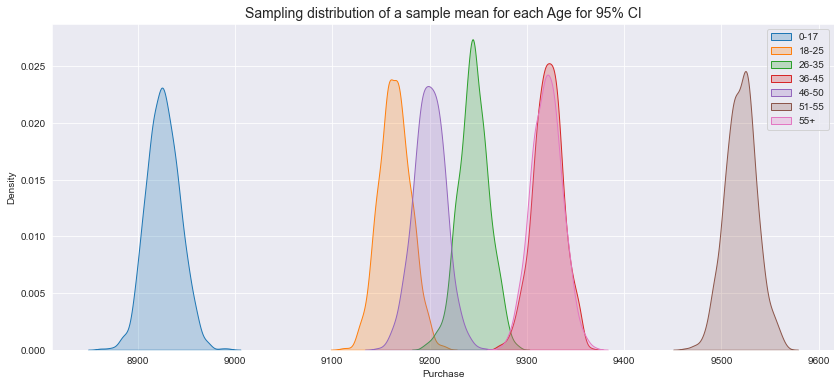

In [400]:
age_dict = {}
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 
for i in range(len(age_data)):
    age_dict[age_list[i]] = age_data.loc[i, "Mean"]
    
fig, ax = plt.subplots(figsize=(14,6))
sns.set_style("darkgrid")
for label_val in age_dict.keys():
    sns.kdeplot(age_dict[label_val], shade = True, label = label_val)

plt.title("Sampling distribution of a sample mean for each Age for 95% CI",fontsize=14)
plt.xlabel('Purchase')
plt.legend(loc='upper right')

plt.show()

In [401]:
age_data.head(7)

Age_Group                                               Mean Lower_limit  \
0      0-17  [8951.83, 8942.68, 8956.38, 8961.25, 8916.28, ...     8882.32   
1     18-25  [9155.46, 9137.54, 9161.63, 9154.48, 9179.18, ...     9122.85   
2     26-35  [9223.71, 9230.36, 9247.11, 9252.85, 9253.33, ...     9204.83   
3     36-45  [9341.87, 9305.36, 9344.84, 9316.61, 9316.05, ...     9281.83   
4     46-50  [9191.59, 9211.22, 9209.48, 9180.4, 9185.09, 9...     9158.06   
5     51-55  [9523.07, 9509.45, 9515.33, 9515.46, 9508.5, 9...     9478.76   
6       55+  [9291.56, 9299.5, 9335.24, 9305.52, 9316.79, 9...     9279.28   

  Upper_limit Sample_Size                  CI  Range Confidence_pct  
0     8969.38      100000  [8882.32, 8969.38]  87.06             99  
1      9205.2      100000   [9122.85, 9205.2]  82.35             99  
2     9285.29      100000  [9204.83, 9285.29]  80.46             99  
3     9360.88      100000  [9281.83, 9360.88]  79.05             99  
4     9241.18      100000  [9158.06, 9241.18]  83.12             99  
5     9560.92      100000  [9478.76, 9560.92]  82.16             99  
6     9360.62      100000  [9279.28, 9360.62]  81.34             99

# Major Inferences

- Spending by Age_group 0-17 is low compared to other age groups.

- Customers in Age_group 51-55 spend the most between [9478.25, 9560.11] for 99% CI

# 5. Final Insights

# Based on EDA

- The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.

- The majority of users come from City Category C, but more people from City Category B tend to purchase, which suggests the same users visit the mall multiple times in City Category B.

- Majority of Customers purchase within the 5,000 - 20,000 range.

- Males clearly purchase more than females. 75% of men and only 25% of women purchase products.

- Most mall customers are between the ages of 26 and 35.60% of purchases are made by people between the ages of 26 and 45

- City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.Purchases are high in city category C

- Most mall customers are between the ages of 26 and 35.City category C has more customers between the ages of 18 and 45.

- In City Category C, there are slightly more female customers.

- Product 5 and 8 is common among females.

- Product Category B is popular among age group 55+

- 58:42 is the ratio between married and unmarried customers

# Based on CLT & CI

- As the sample size increases, the two groups start to become distinct. With increasing sample size, Standard error of the mean in the samples decreases. For sample size 100000 is 0.49 with confidence is 90%.

- Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.

- Using confidence interval 99%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90% & 95%

- For Female (sample size 100000) range for mean purchase with confidence interval 99% is [8634.54, 8707.85]

- For Male range for mean purchase with confidence interval 99% is [9328.03, 9409.07]

- When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases. For Female Confidence percent as [90,95,99] have difference between the upper & lower limits as [50.46,59,73.31]

- Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.

- For Unmarried customer (sample size 100000) range for mean purchase with confidence interval 99% is [9225.71, 9305.43]	

- For married customer (sample size 100000) range for mean purchase with confidence interval 99% is [9218.62, 9303.25]

- For Female (sample size 100000) range for mean purchase with confidence interval 90% is [8702.35, 8751.09]

- For Male (sample size 100000) range for mean purchase with confidence interval 90% is [9402.28, 9455.2]

# 6. Recommendations

- As per the analysis females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.

- The management should have some offers on kids (0-17 years) in order to increase sales as there is lowest mean purchase in this age group.

- In order to attract more young shoppers, they can offer some discounts, video games subscription etc to lure more younger generation.

- There are more married customers than single. But as per analysis single customers mean purchase is higher than married one. Management needs to focus more on married customers as they are large in numbers but purchasing less.

- Product Category B is quite demanded for 55+ age group. There is sudden drop in other categories A & C for the same age group. Management need to focus more on other categories for 55+ age group.

- Most of customer stayed more than 2 years  in same city having slightly lower mean purchase. Managment should perform research  for all the stores why it is low

- As product category 5 & 8 are quite demanding among females. In order to increase sale, management needs to introduce more items of these product categories in their stores

- Management should conduct a survey for different age group, what they like most about some particular brand of specific product category to get more insights which will help businesses in customer aquistion & retention.

- As product category 1 & 5 are popular among both male and female, in order to increase sales management need to give additional offers and introduce some strategry regarding cross-sale or upsell.

- Management need to find out the reason why proudct category 9 & 17 are less bought. If customers don't like this product that needs to be removed from inventory by slashing the price down.

- As this dataset contituted on  Black Friday Sales data, it would be quite obvious that for specific age group, specific product category there would be more demand and churn. Management can draw insights as per analysis for the customer purchase behaviour.